###Trabajo Parcial, 2024 - I
###Alumnos:
####Angel Ruben Zuñiga Lovera – u202111299
####Andy Johan Muñico Soto – u201523017
####Franco Fernando Simonini Lizonde – u202119072
####Jak Cristian Campos Espinoza – u20211a184


###Docente:
##-Reyes Silva, Patricia Daniela

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [105]:
eth = pd.read_csv('final_data.csv')

In [106]:
eth

,fecha,blockchain,token,nombre,precio,ranking,categoria
0,2024-05-01,aptos-ecosystem,BONK,Bonk,"$0,00002261",2,meme
1,2024-05-01,aptos-ecosystem,CDT,CheckDot,"$0,4435",14,ia
2,2024-05-01,aptos-ecosystem,MBX,Marblex,"$0,7529",6,game
3,2024-05-01,aptos-ecosystem,TIN,Token IN,"$0,05304",15,game
4,2024-05-01,aptos-ecosystem,PROPS,Propbase,"$0,1349",8,rwa
...,...,...,...,...,...,...,...
3582,2024-05-01,zksync-ecosystem,ZKDOGE,zkDoge,"$0,00007153",43,meme
3583,2024-05-01,zksync-ecosystem,ZKPEPE,ZKPepe,$0.056481,49,meme
3584,2024-05-01,zksync-ecosystem,DERP,Derp,$0.072987,60,meme
3585,2024-05-01,zksync-ecosystem,DEXTF,Domani Protocol,"$0,1670",17,rwa


###Blockchain mas verificado y menos verificado

###Distribución de Categorias

In [107]:
# Mapeo de nombres de categorías a valores numéricos
mapeo_categoria = {
    'game': 1,
    'ia': 2,
    'meme': 3,
    'rwa': 4
}

# Convertir las categorías a valores numéricos utilizando el mapeo
eth['categoria_numerica'] = eth['categoria'].map(mapeo_categoria)

In [108]:
eth

,fecha,blockchain,token,nombre,precio,ranking,categoria,categoria_numerica
0,2024-05-01,aptos-ecosystem,BONK,Bonk,"$0,00002261",2,meme,3
1,2024-05-01,aptos-ecosystem,CDT,CheckDot,"$0,4435",14,ia,2
2,2024-05-01,aptos-ecosystem,MBX,Marblex,"$0,7529",6,game,1
3,2024-05-01,aptos-ecosystem,TIN,Token IN,"$0,05304",15,game,1
4,2024-05-01,aptos-ecosystem,PROPS,Propbase,"$0,1349",8,rwa,4
...,...,...,...,...,...,...,...,...
3582,2024-05-01,zksync-ecosystem,ZKDOGE,zkDoge,"$0,00007153",43,meme,3
3583,2024-05-01,zksync-ecosystem,ZKPEPE,ZKPepe,$0.056481,49,meme,3
3584,2024-05-01,zksync-ecosystem,DERP,Derp,$0.072987,60,meme,3
3585,2024-05-01,zksync-ecosystem,DEXTF,Domani Protocol,"$0,1670",17,rwa,4


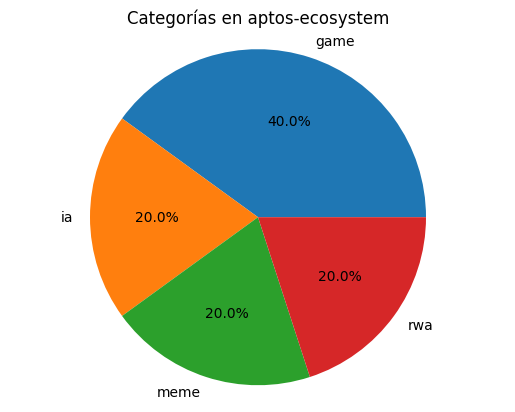

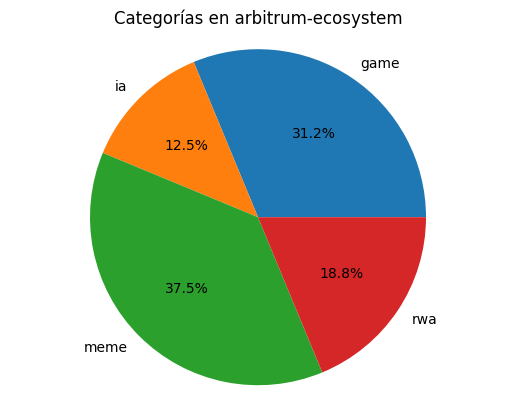

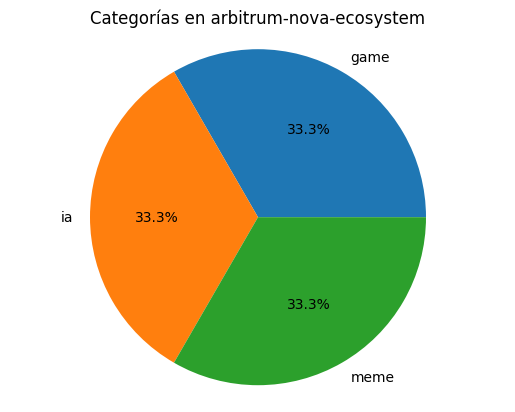

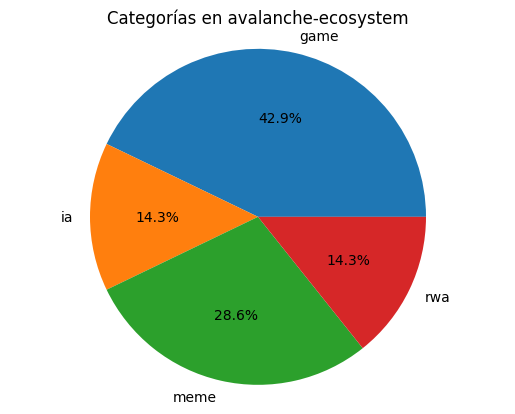

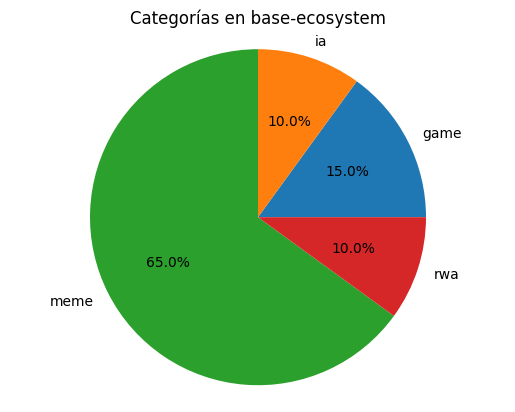

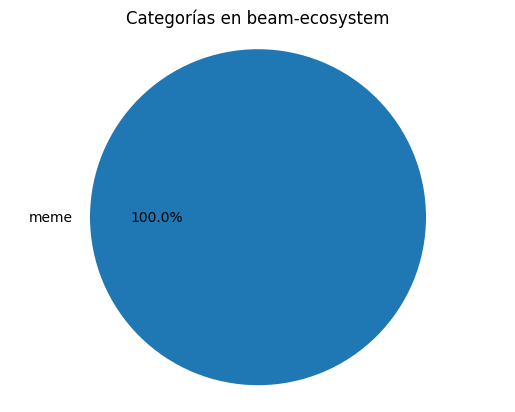

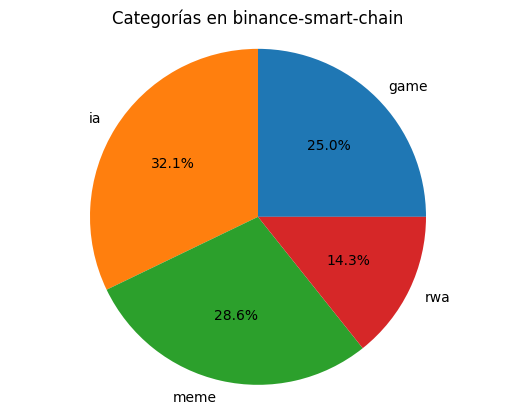

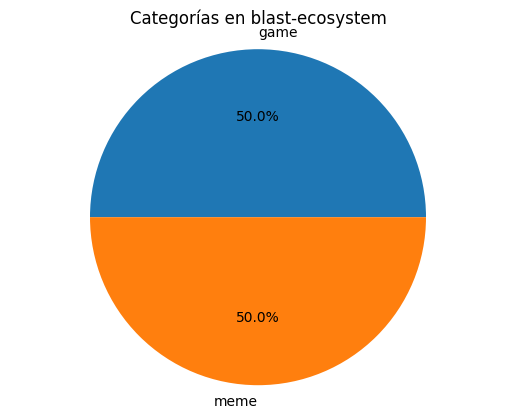

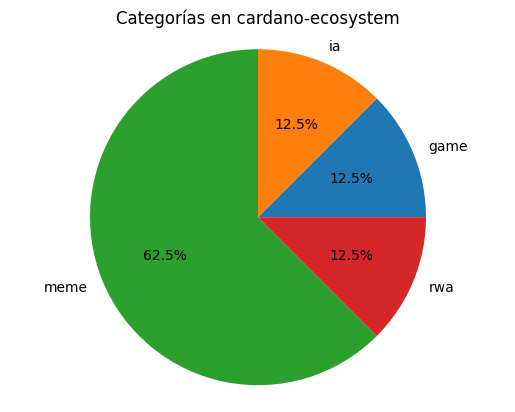

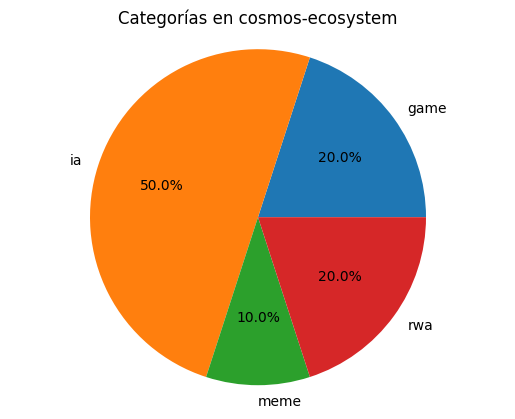

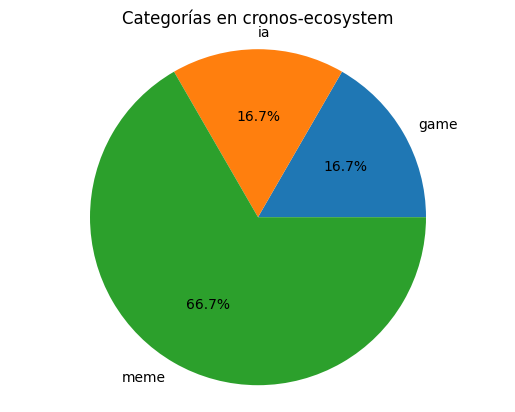

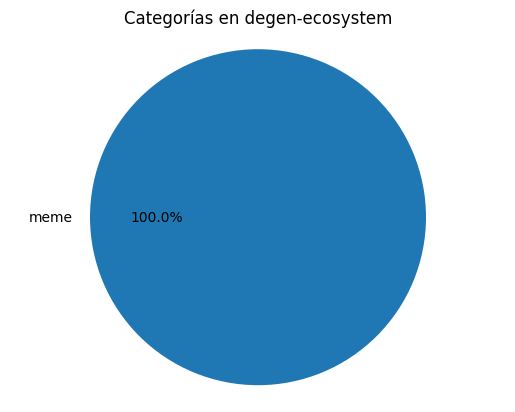

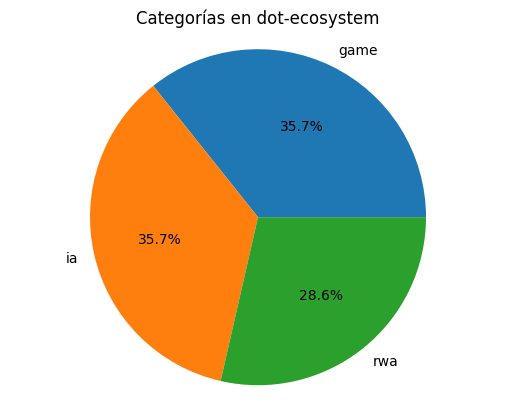

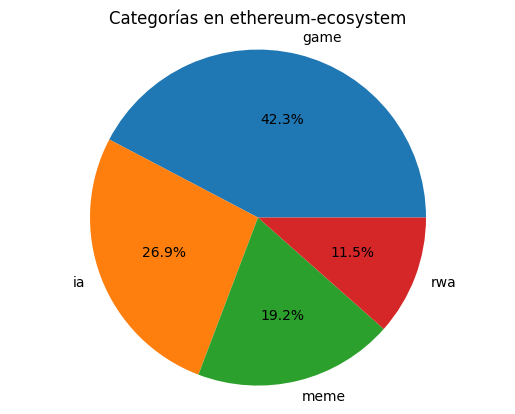

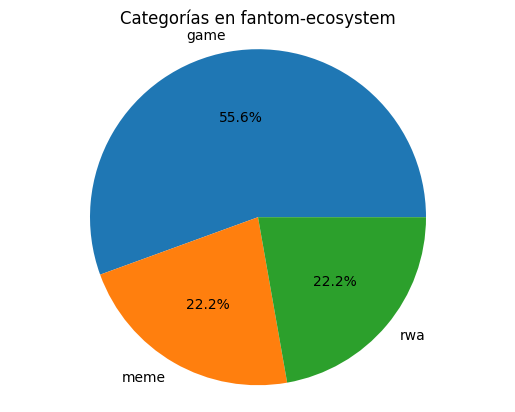

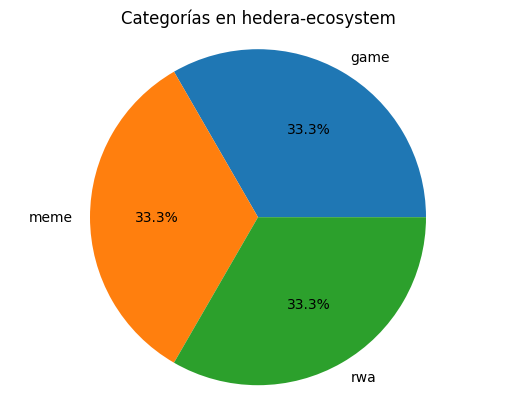

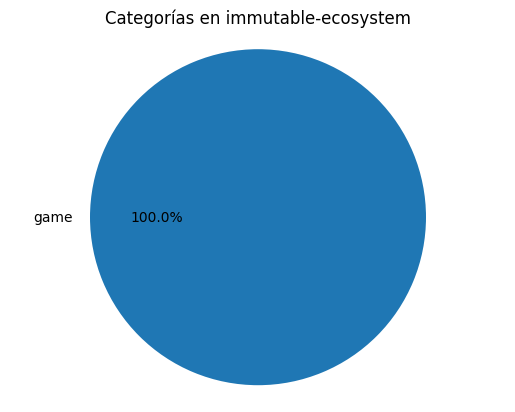

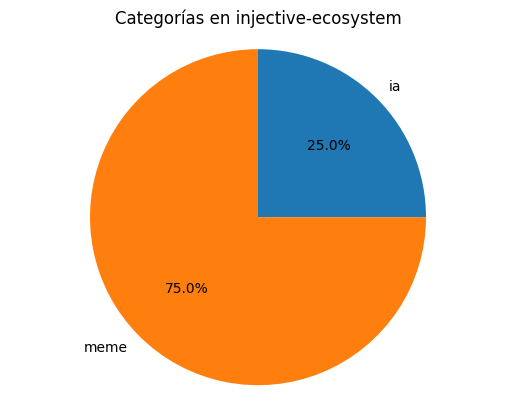

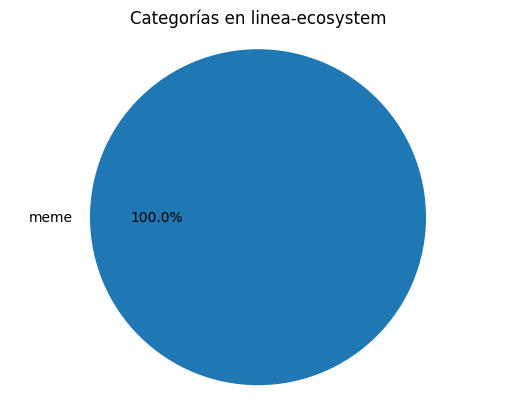

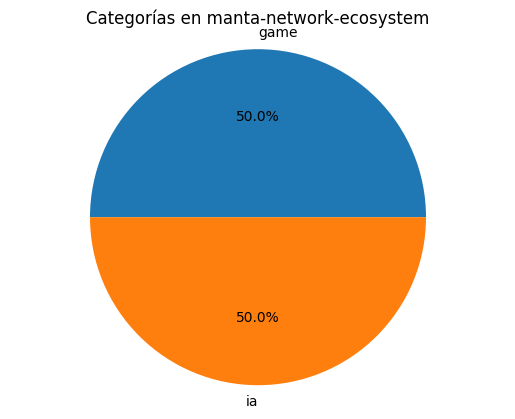

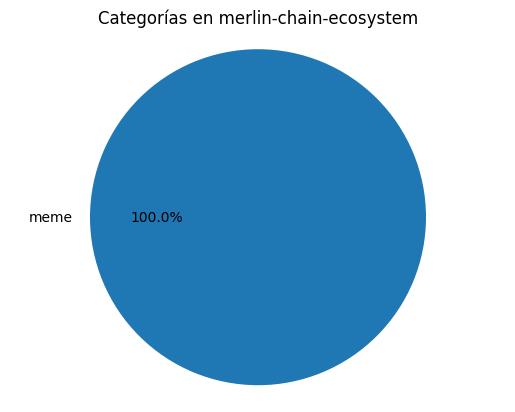

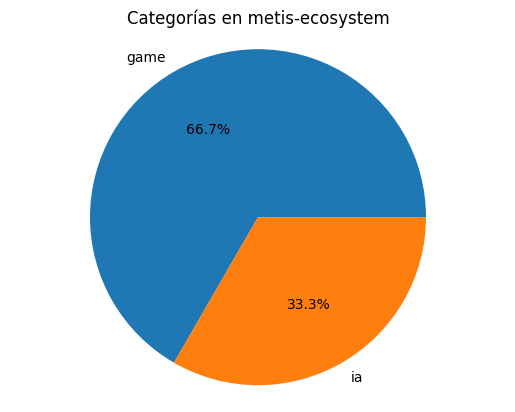

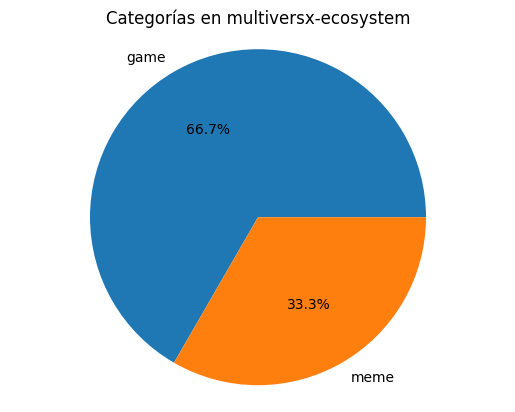

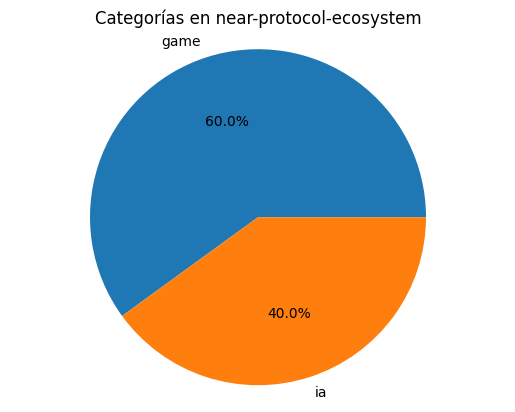

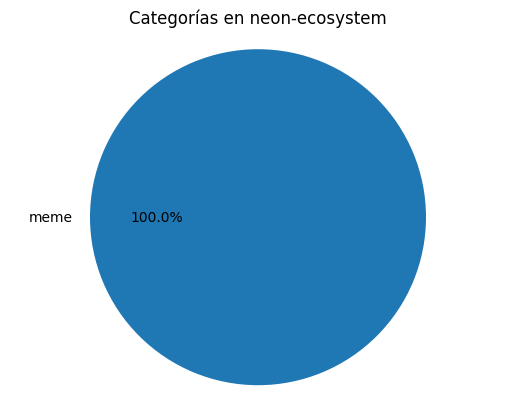

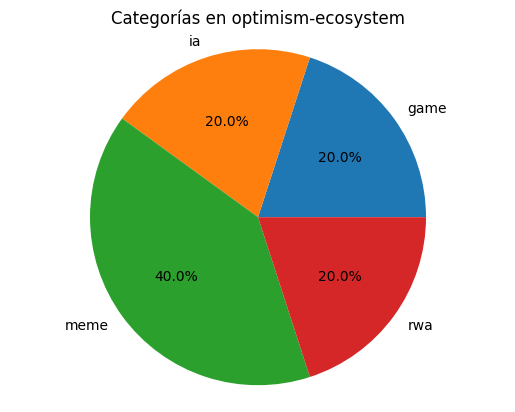

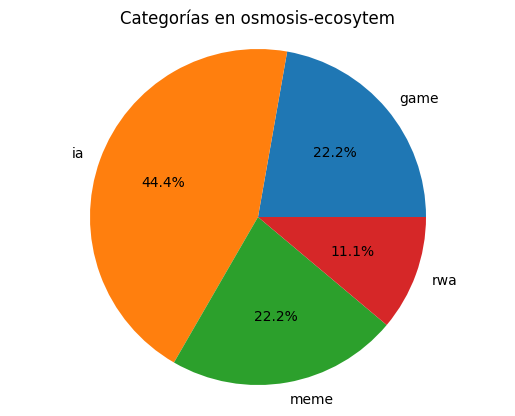

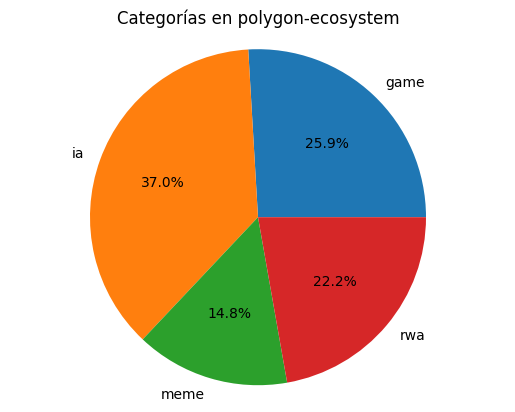

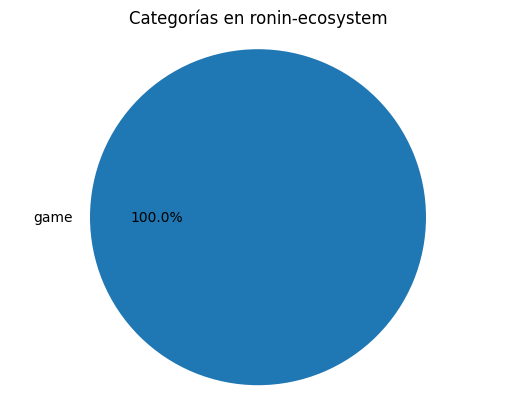

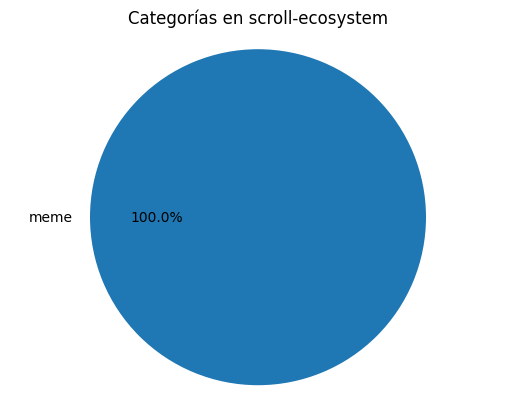

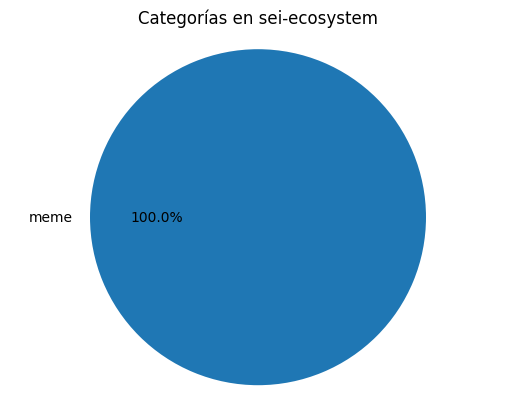

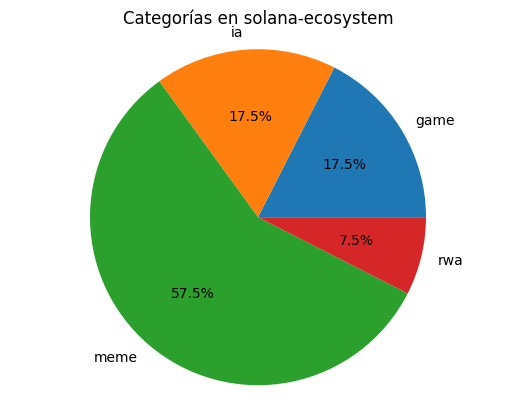

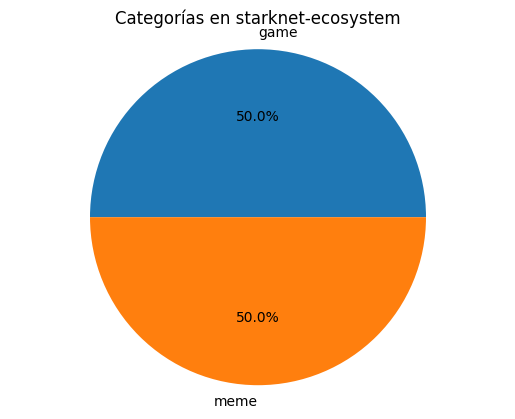

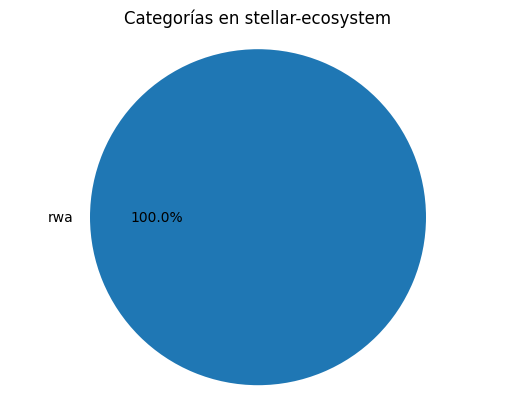

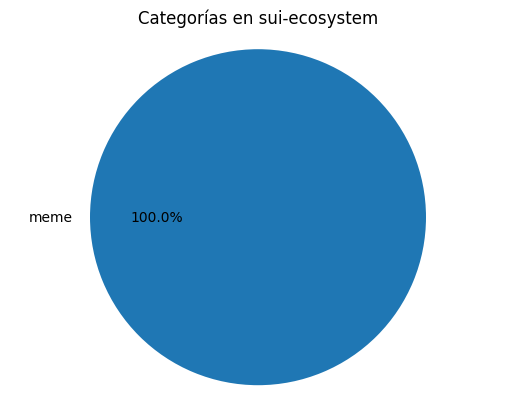

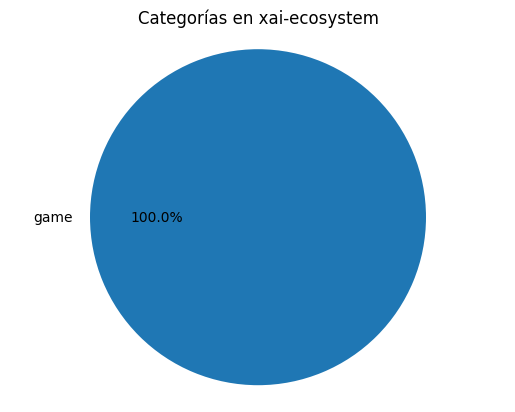

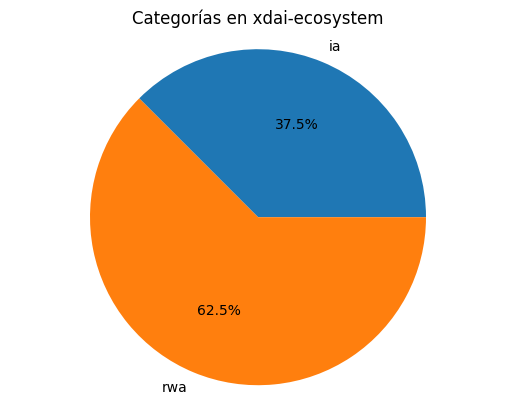

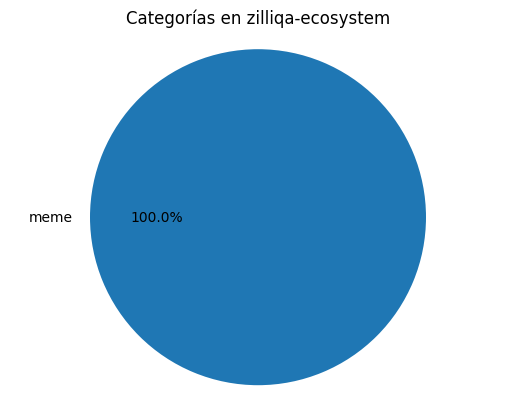

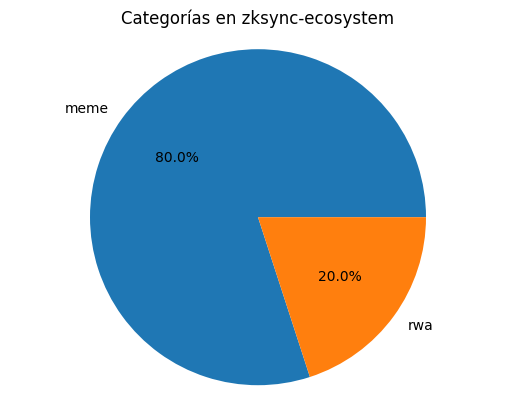

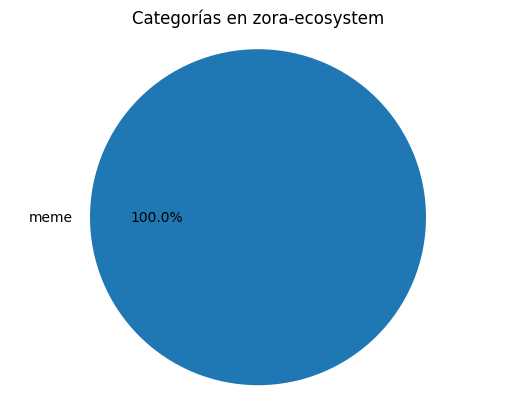

In [109]:
# Obtener una lista de las blockchains únicas en el conjunto de datos
blockchains_unicas = eth['blockchain'].unique()
# Agrupa los datos por "blockchain" y "categoria" y cuenta el número de registros en cada grupo
grouped = eth.groupby(['blockchain', 'categoria']).size().reset_index(name='count')

# Calcula el porcentaje de cada categoría dentro de cada blockchain
grouped['percentage'] = grouped.groupby('blockchain')['count'].transform(lambda x: (x / x.sum()) * 100)

# Itera sobre las blockchains únicas y crea un gráfico de pie para cada una
blockchains = grouped['blockchain'].unique()
for blockchain in blockchains:
    blockchain_data = grouped[grouped['blockchain'] == blockchain]
    plt.figure()
    plt.pie(blockchain_data['percentage'], labels=blockchain_data['categoria'], autopct='%1.1f%%')
    plt.title(f'Categorías en {blockchain}')
    plt.axis('equal')
    plt.show()

###Contar Categorias en total

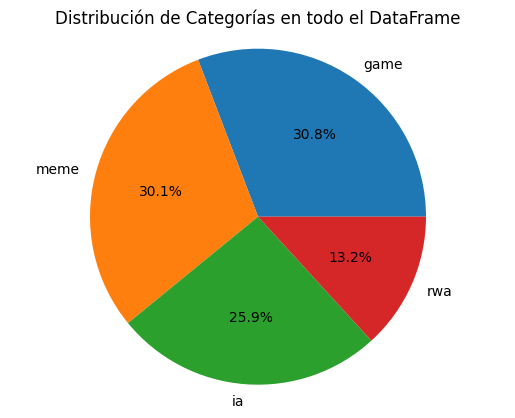

In [110]:
# Contar el número de veces que aparece cada categoría en todo el DataFrame
categoria_counts = eth['categoria'].value_counts()

# Crear el gráfico de pie
plt.figure()
plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Categorías en todo el DataFrame')
plt.axis('equal')
plt.show()

###Comparando Precio con Categoria

<ipython-input-112-b1d7d5d9536e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='precio', data=eth_copy, palette=colors.values())


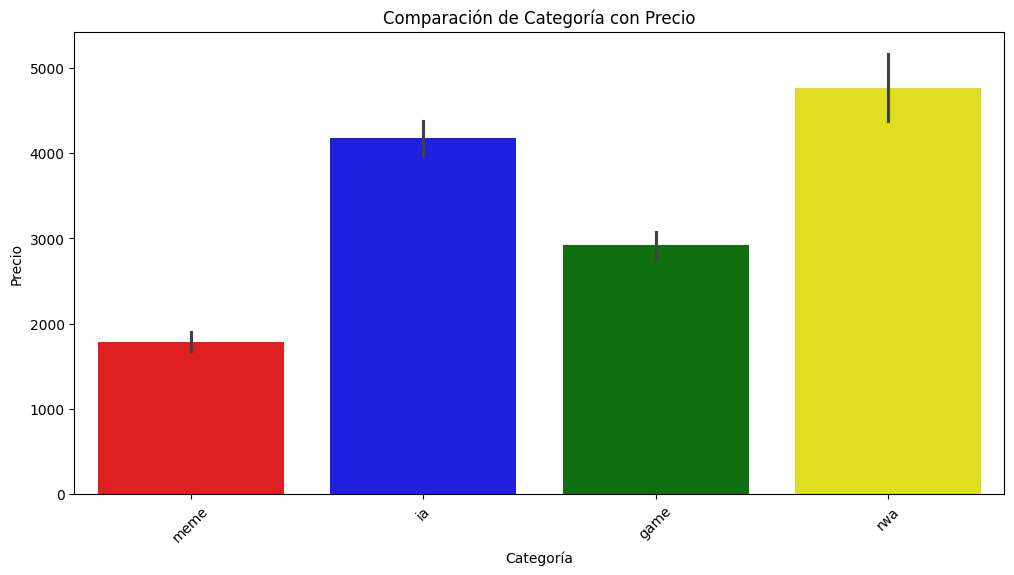

<ipython-input-112-b1d7d5d9536e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria', y='precio', data=eth_copy, palette=colors.values())


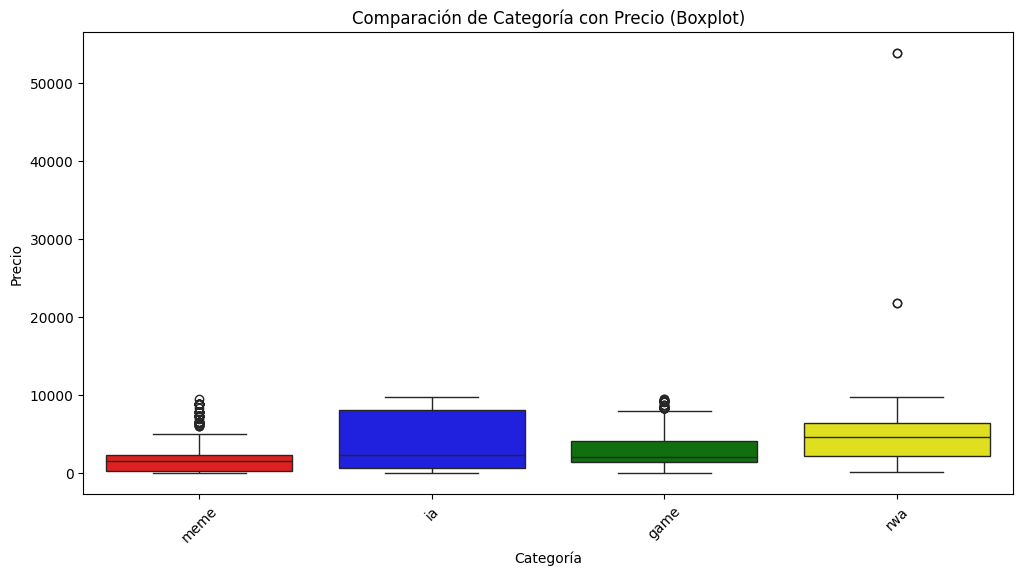

In [112]:
# Copiar el DataFrame original para evitar modificar los datos originales
eth_copy = eth.copy()

# Convertir el precio a formato numérico en la copia
eth_copy['precio'] = eth_copy['precio'].str.replace('$', '').str.replace(',', '').astype(float)

# Definir colores para cada categoría
colors = {'meme': 'red', 'ia': 'blue', 'game': 'green', 'rwa': 'yellow'}

# Gráfico de Barras
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria', y='precio', data=eth_copy, palette=colors.values())
plt.title('Comparación de Categoría con Precio')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria', y='precio', data=eth_copy, palette=colors.values())
plt.title('Comparación de Categoría con Precio (Boxplot)')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

###Comparando Precio con Ranking

<ipython-input-69-bf1ef2d359db>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_nombre', y='ranking', data=promedio_ranking_por_categoria_total, palette=colores_personalizados)


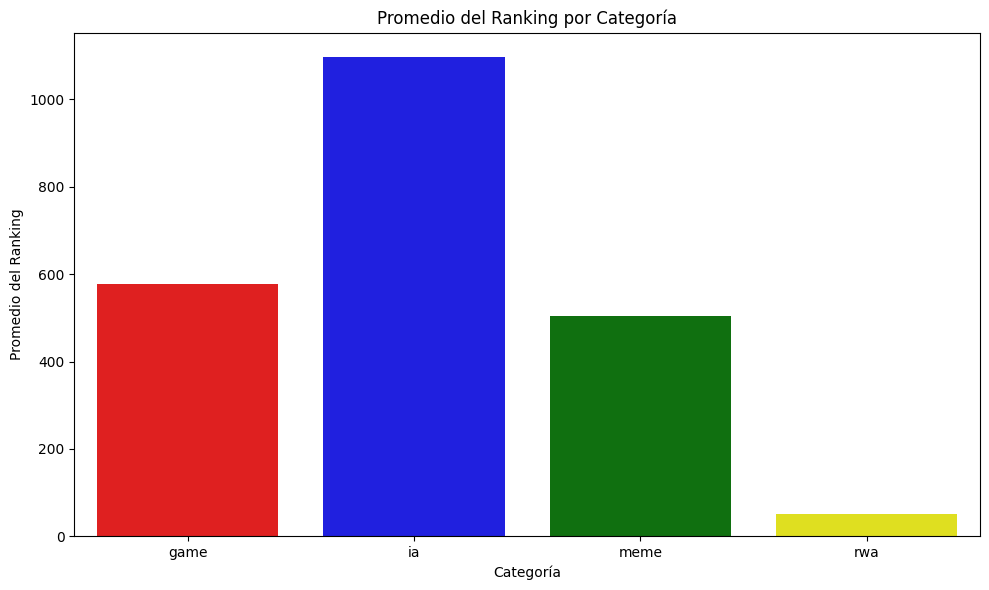

In [69]:
# Cargar el dataframe eth
# Supongamos que aquí cargas tu DataFrame eth

# Definir colores personalizados para cada categoría
colores_personalizados = {'game': 'red', 'ia': 'blue', 'meme': 'green', 'rwa': 'yellow'}

# Calcular el promedio del ranking por categoría y blockchain
promedio_ranking_por_categoria = eth.groupby(['categoria_nombre', 'blockchain'])['ranking'].mean().reset_index()

# Calcular el promedio del ranking por categoría
promedio_ranking_por_categoria_total = promedio_ranking_por_categoria.groupby('categoria_nombre')['ranking'].mean().reset_index()

# Crear el gráfico de barras para el promedio del ranking por categoría
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_nombre', y='ranking', data=promedio_ranking_por_categoria_total, palette=colores_personalizados)
plt.xlabel('Categoría')
plt.ylabel('Promedio del Ranking')
plt.title('Promedio del Ranking por Categoría')

plt.tight_layout()
plt.show()

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


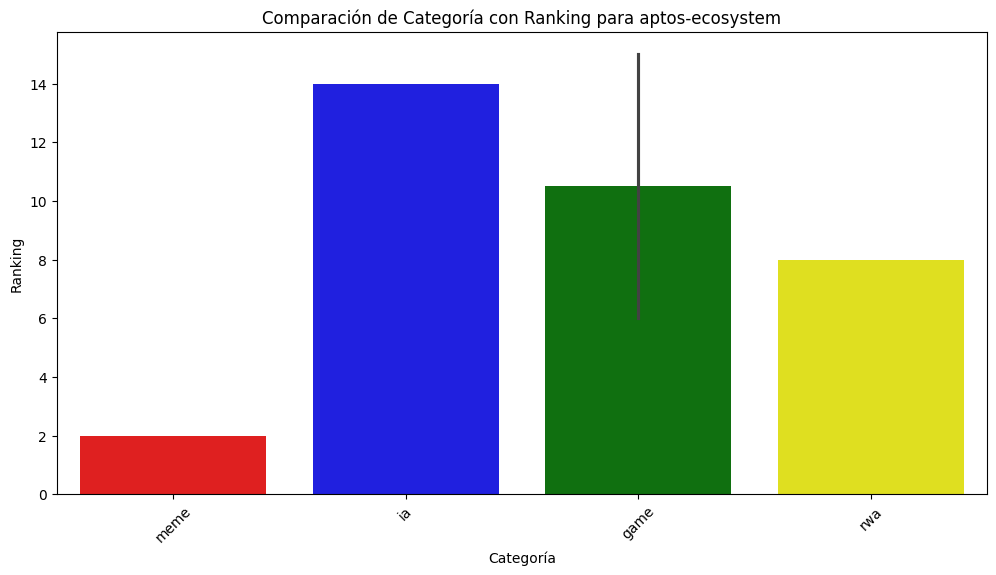

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


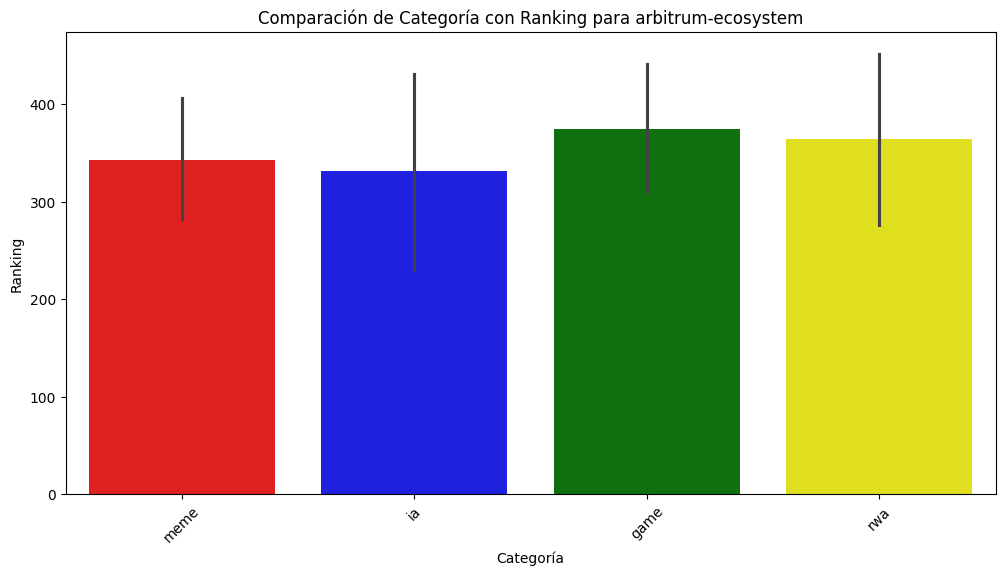

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


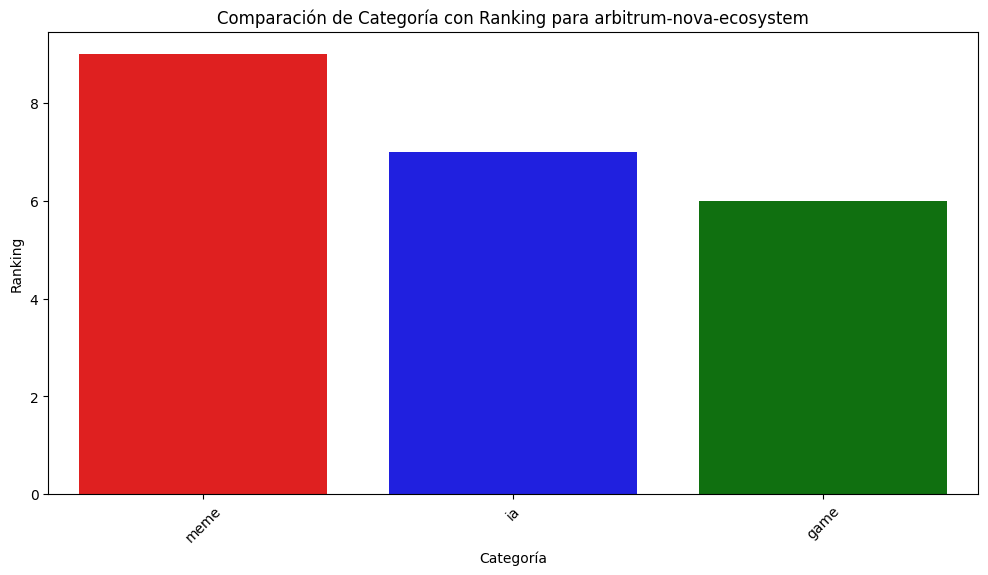

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


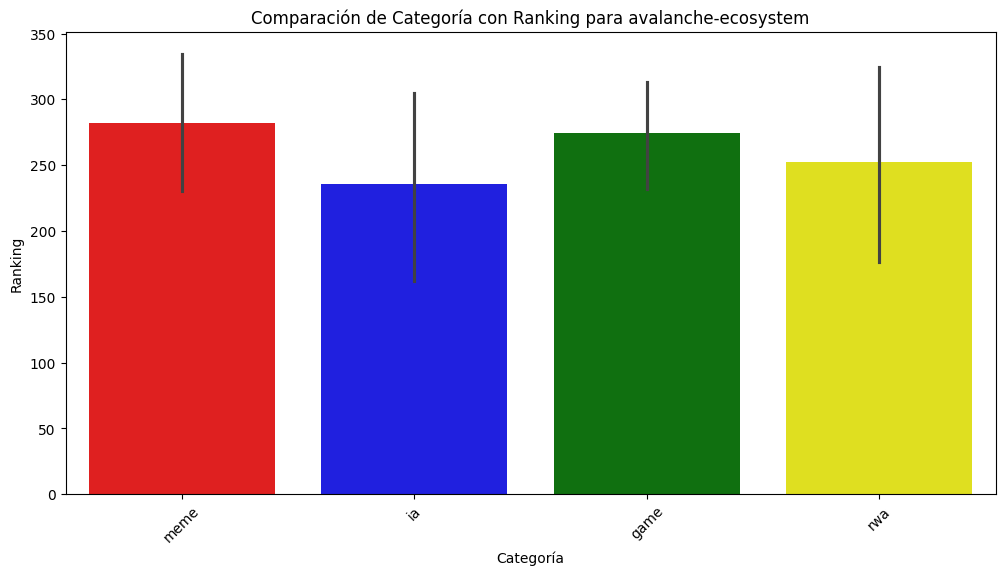

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


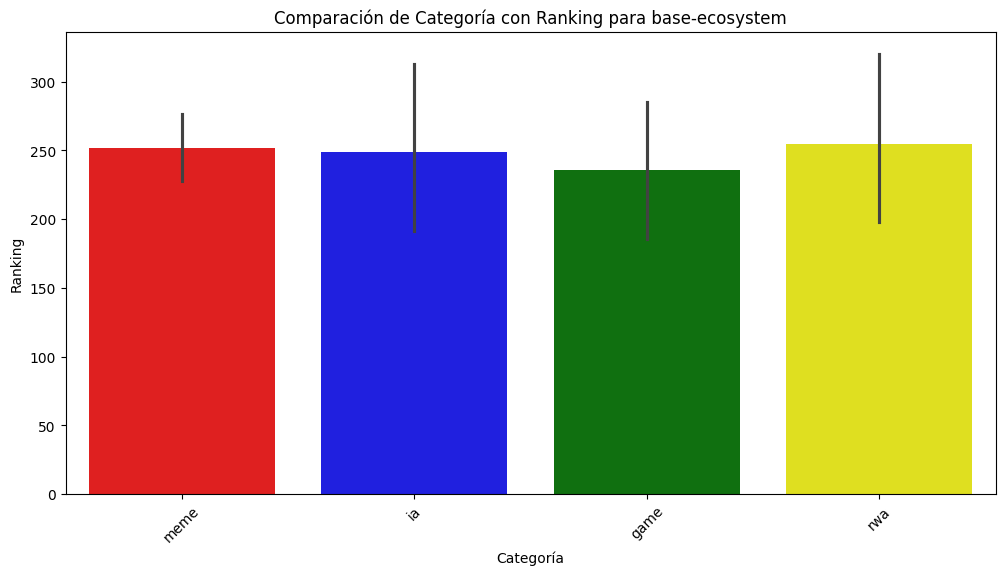

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


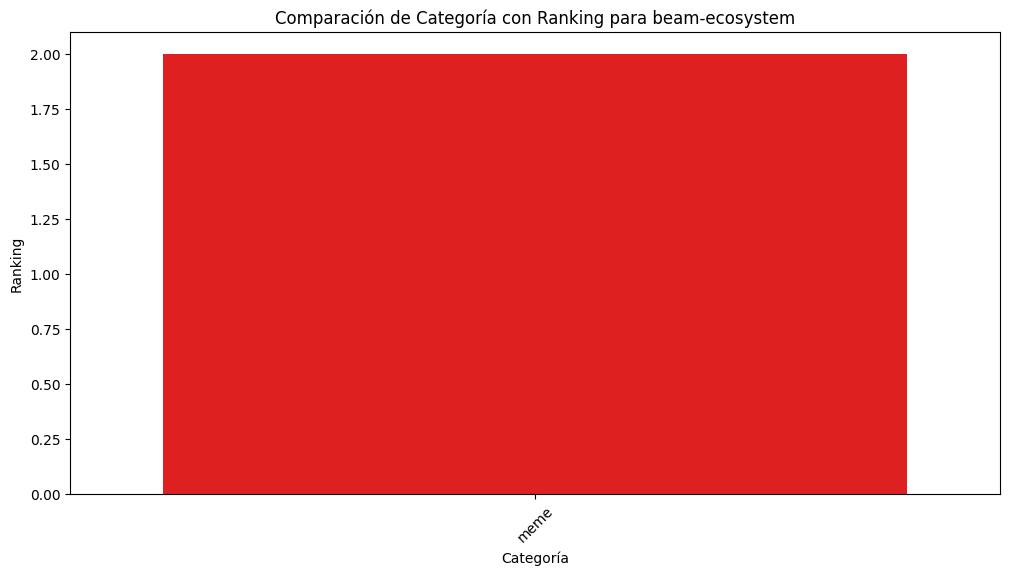

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


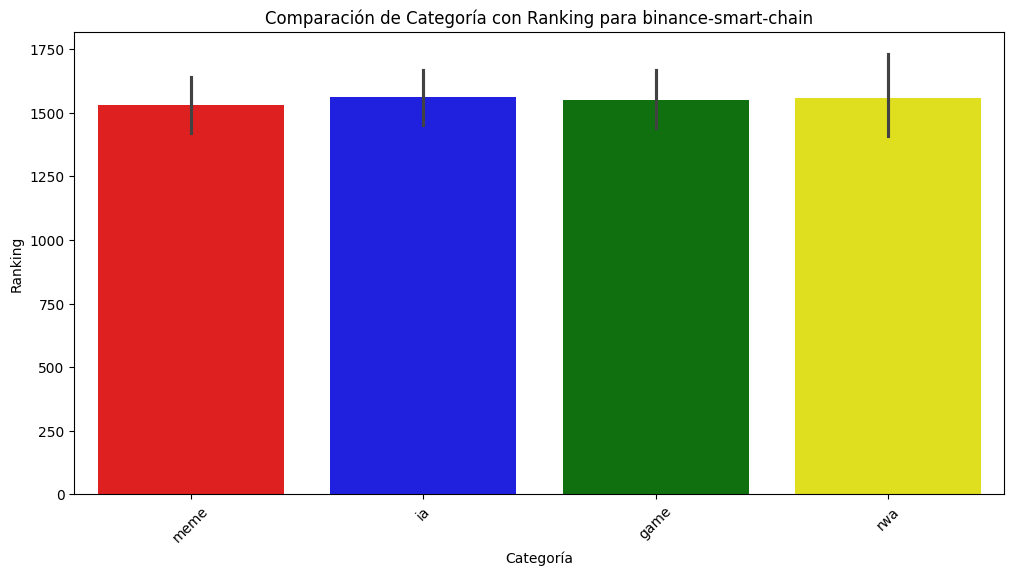

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


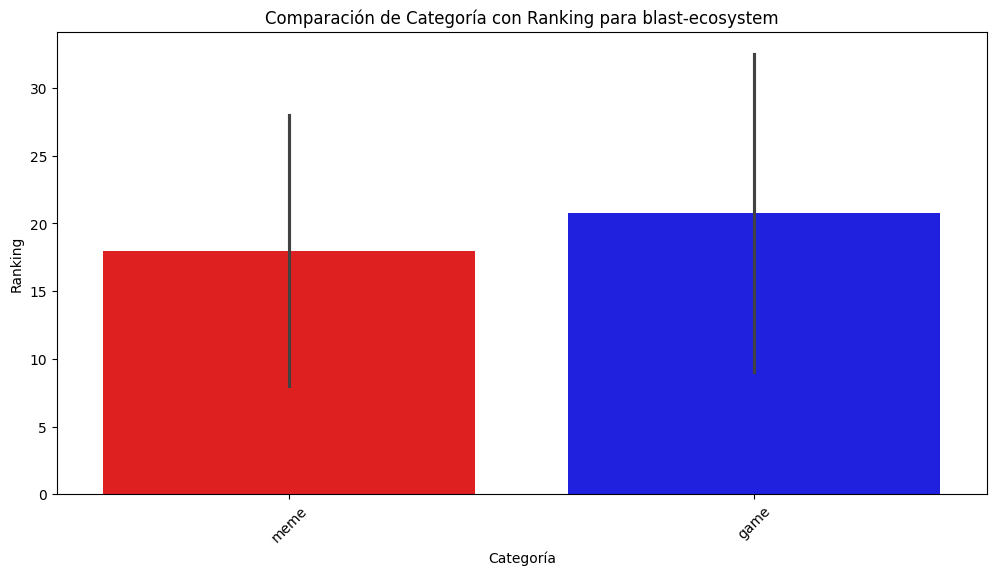

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


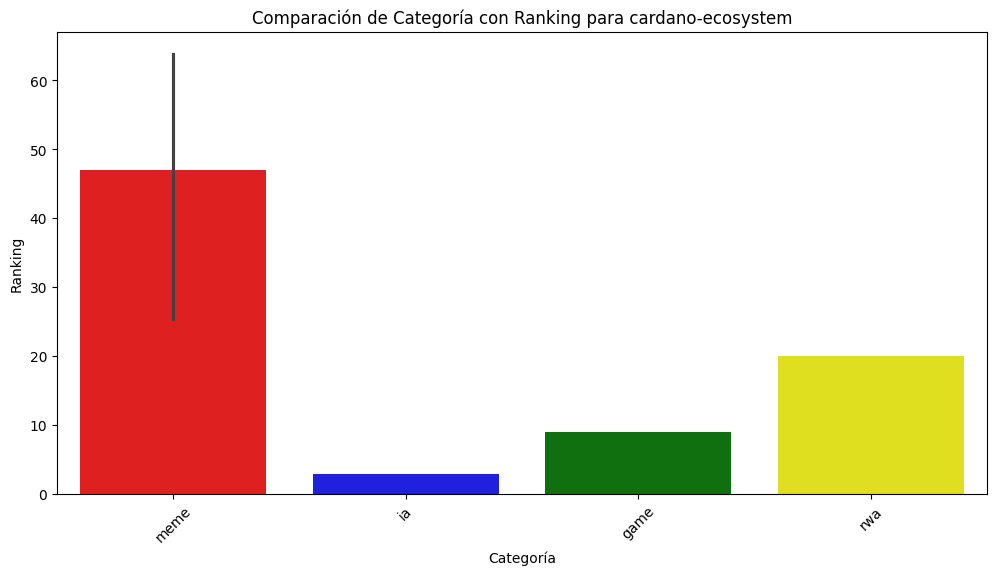

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


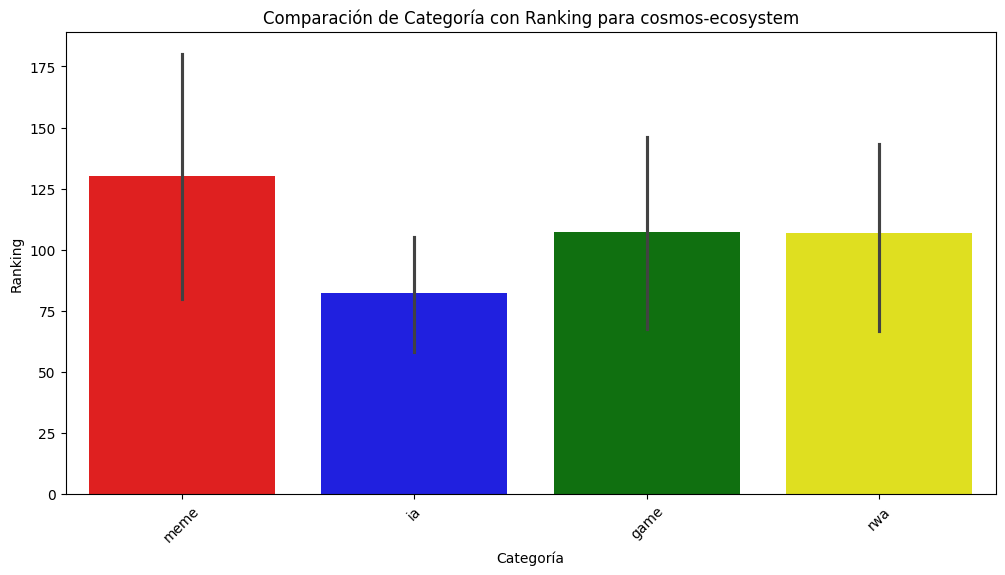

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


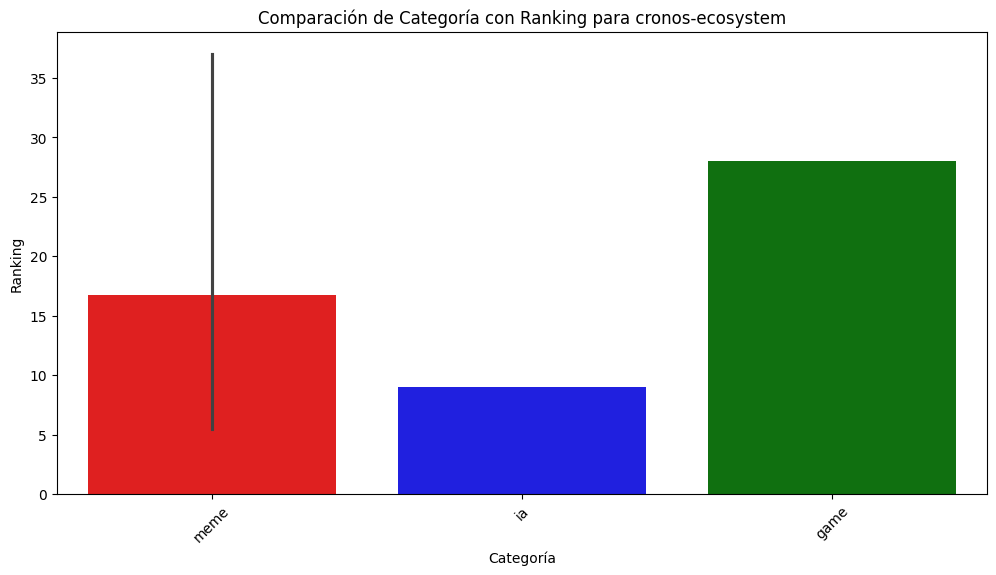

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


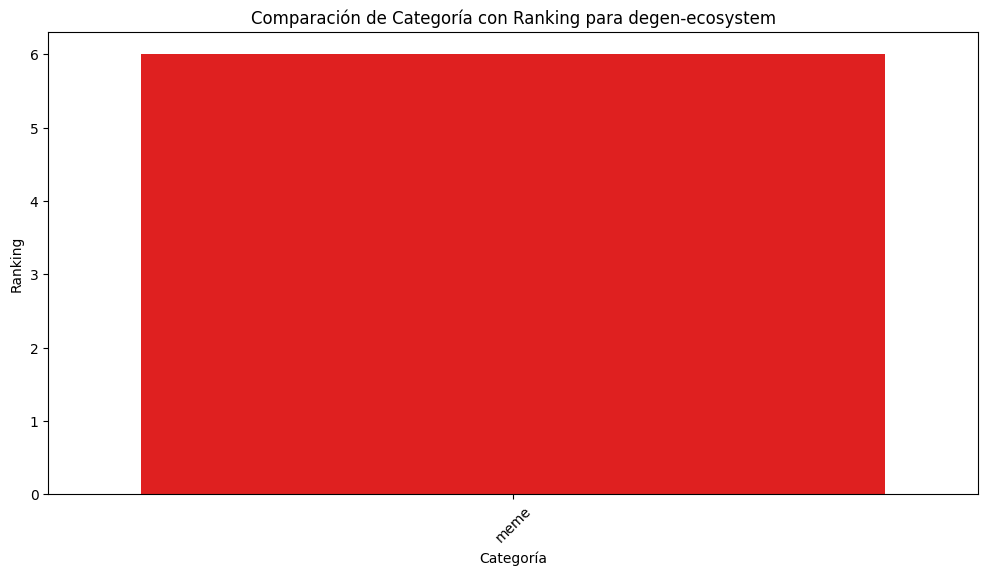

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


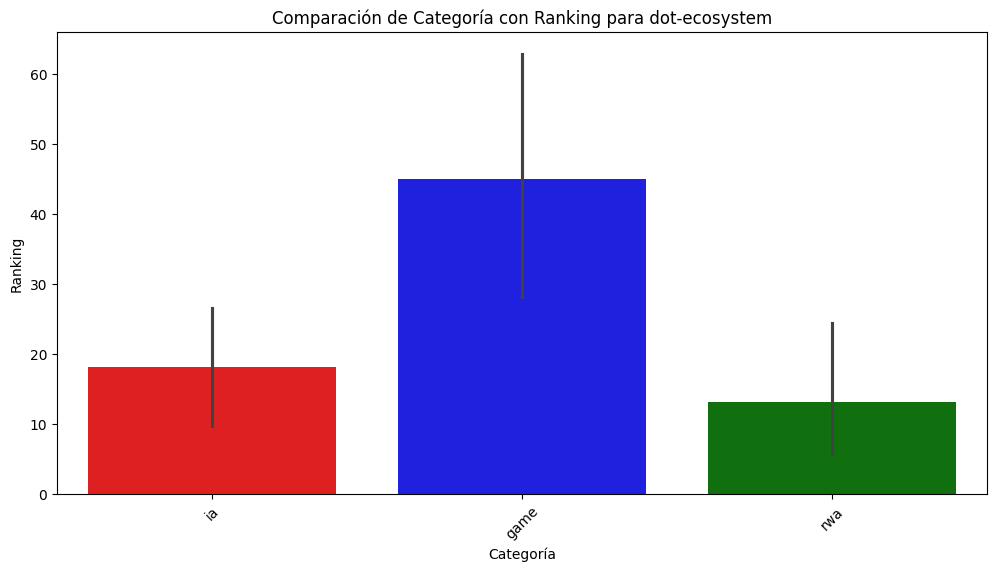

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


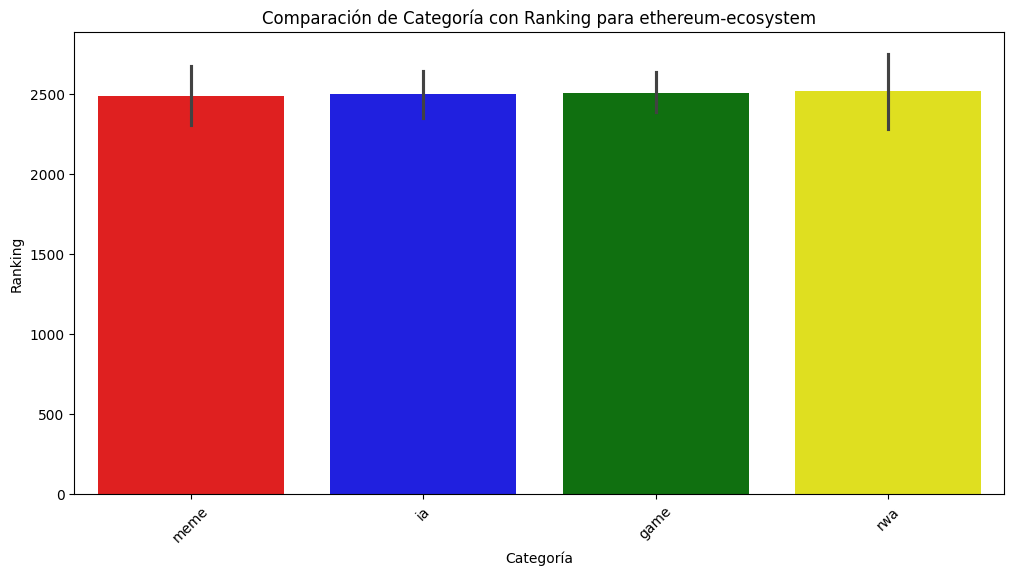

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


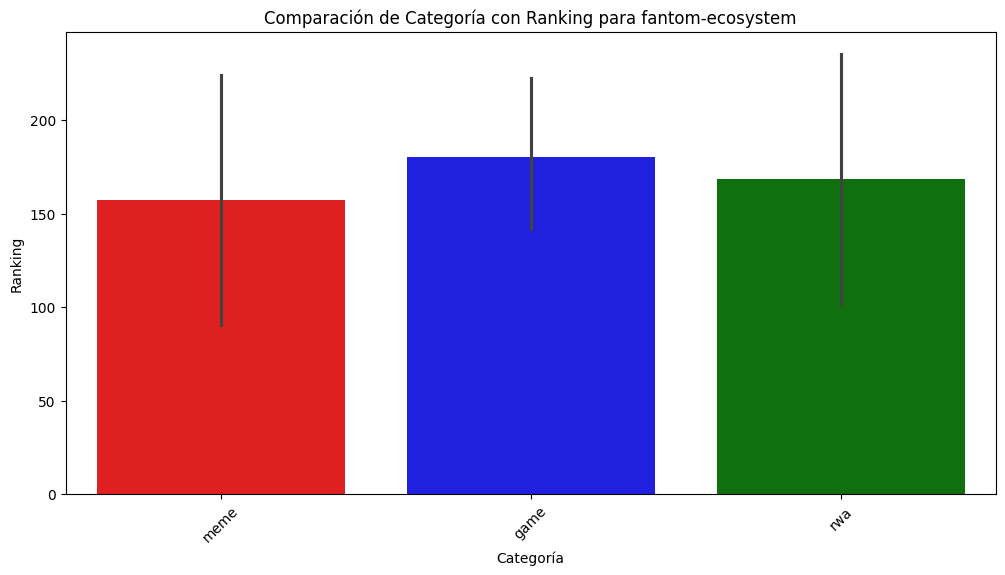

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


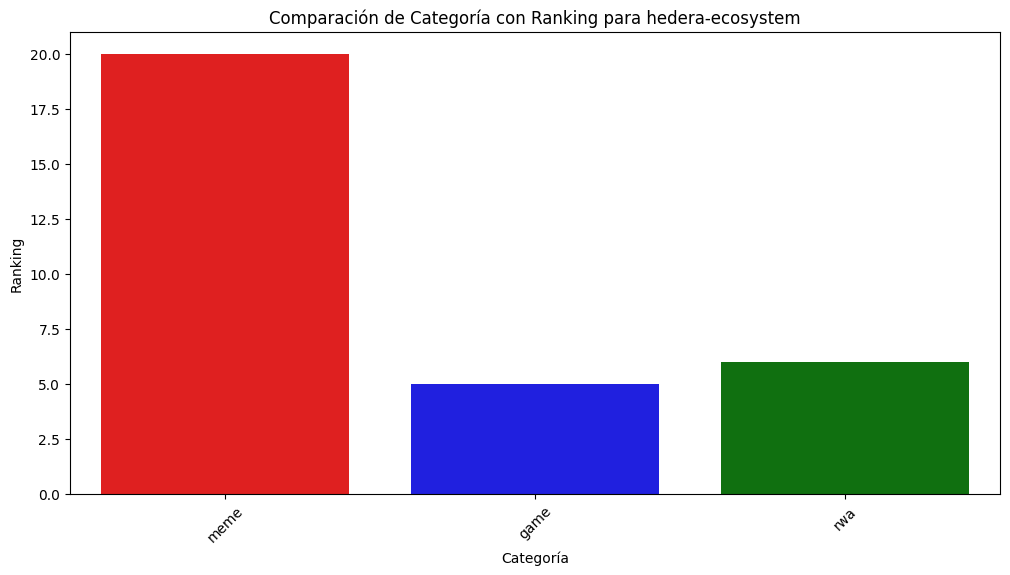

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


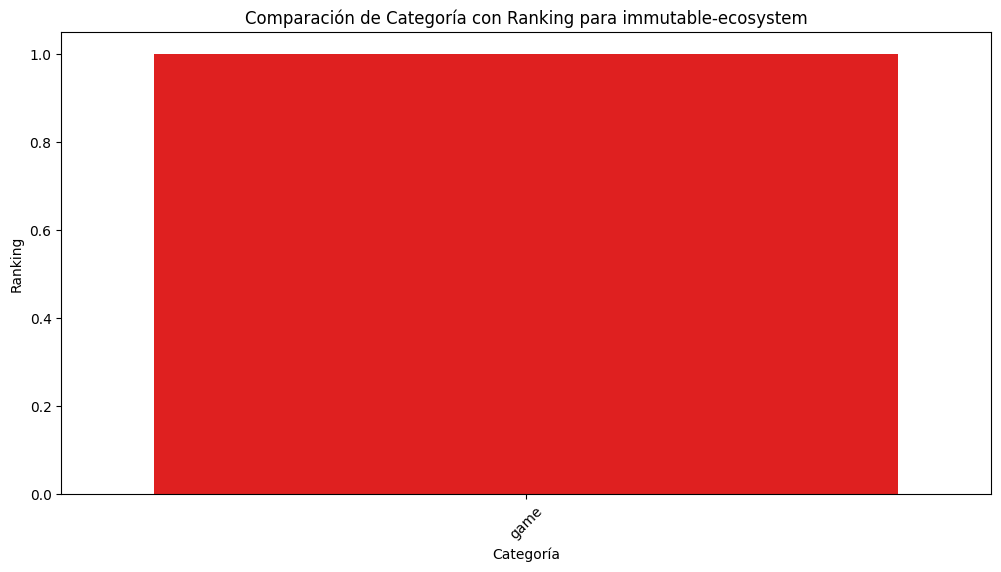

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


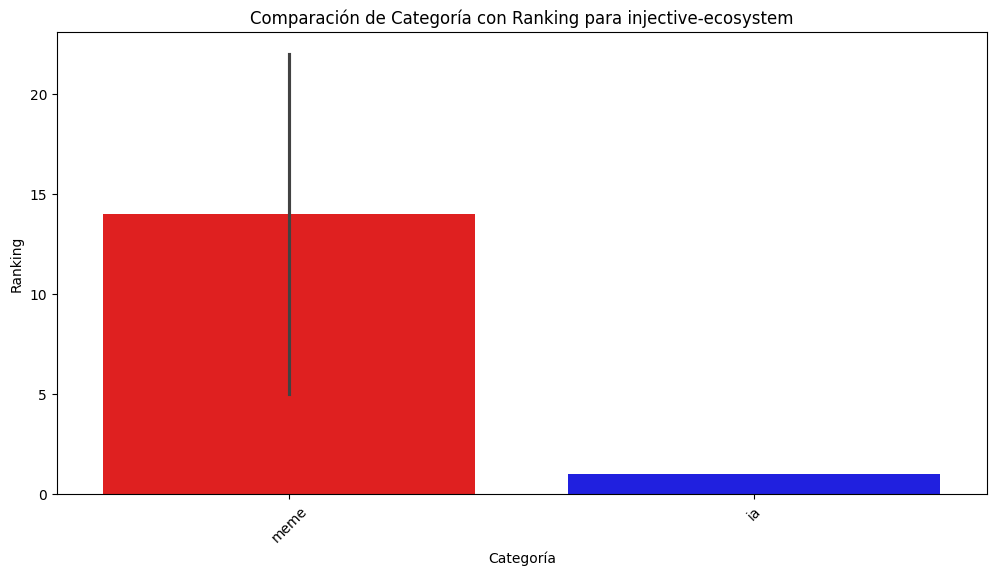

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


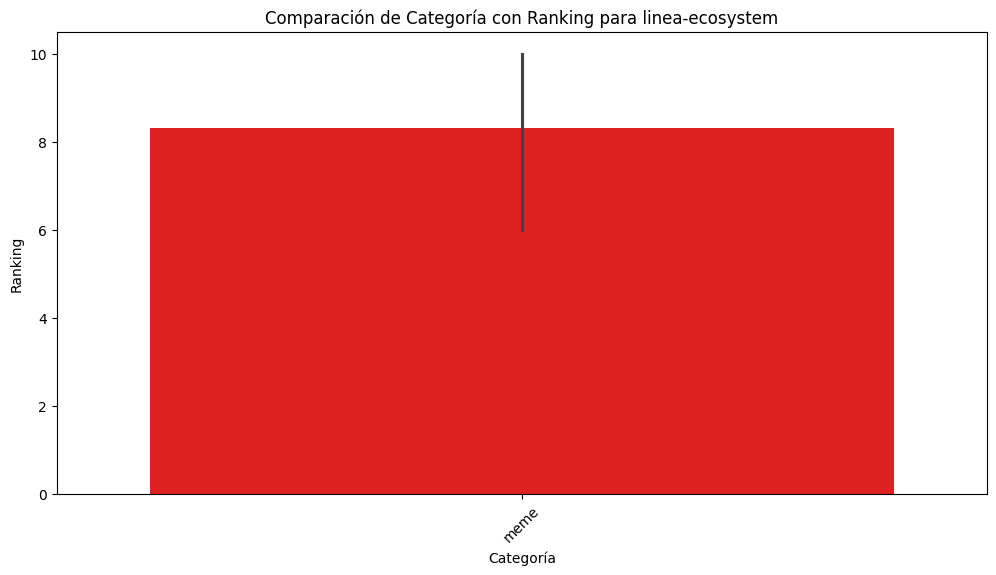

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


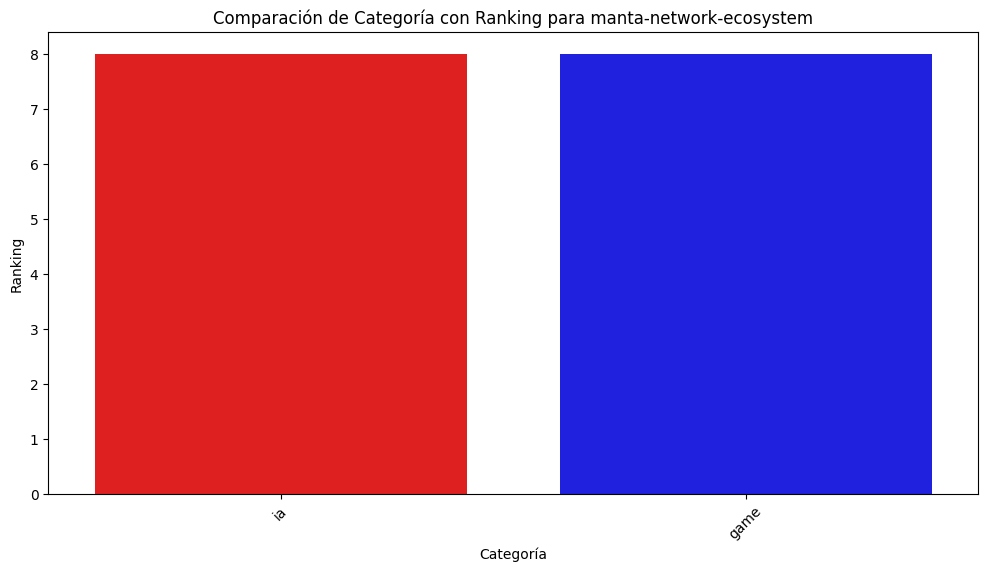

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


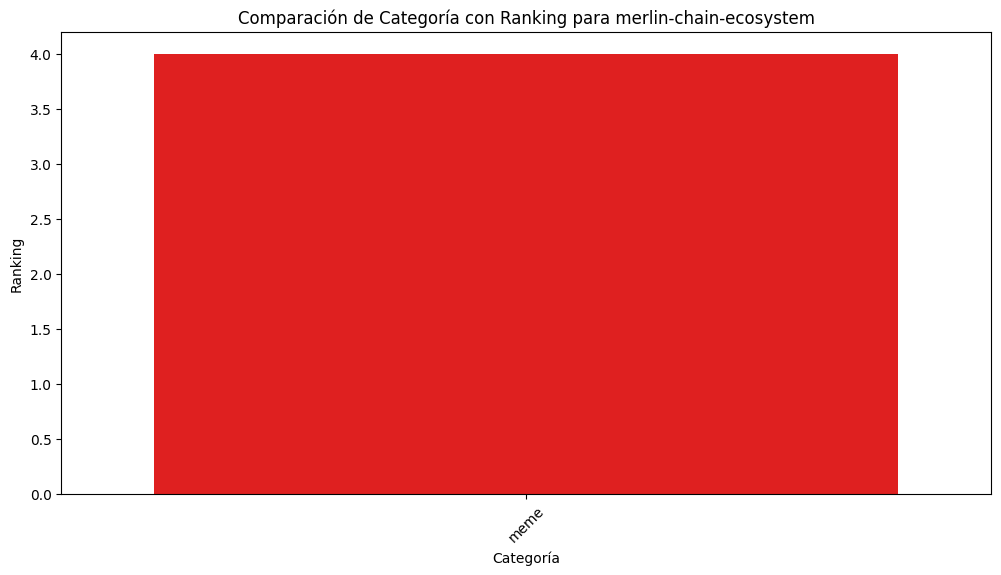

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


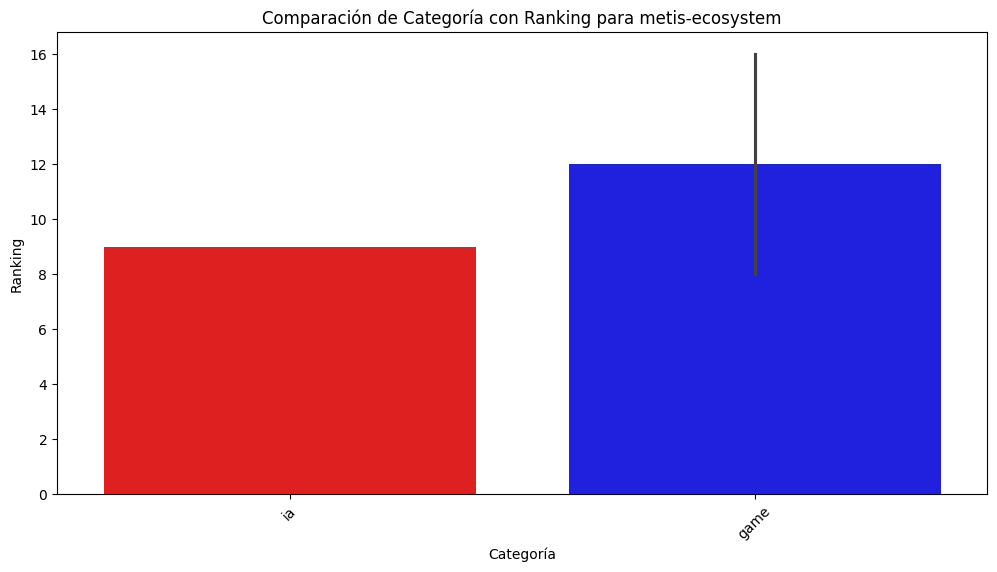

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


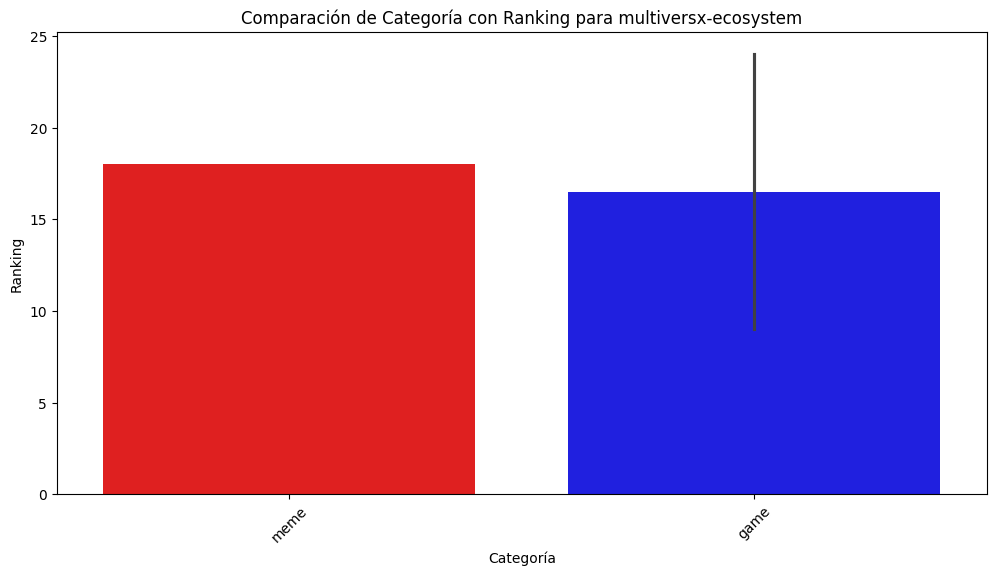

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


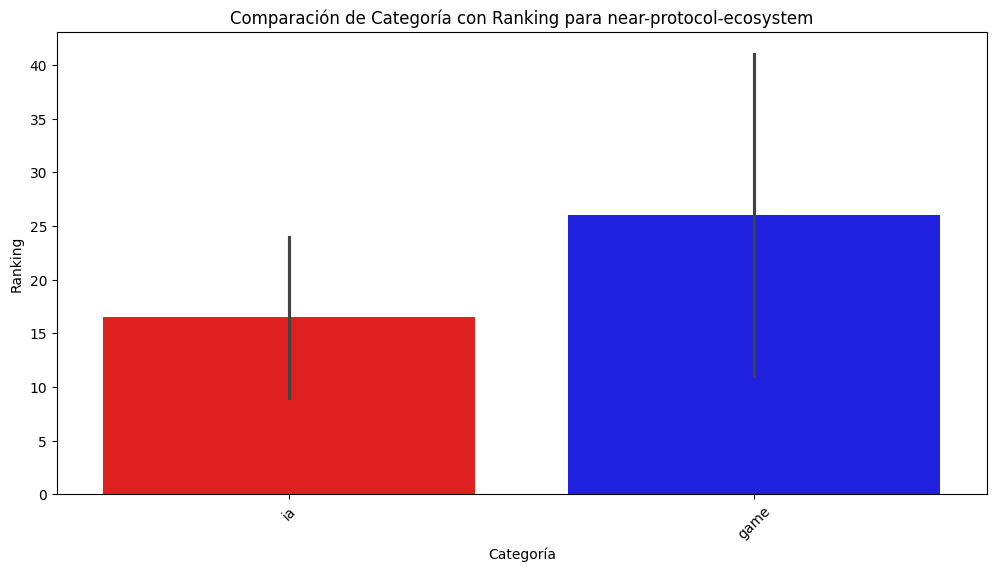

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


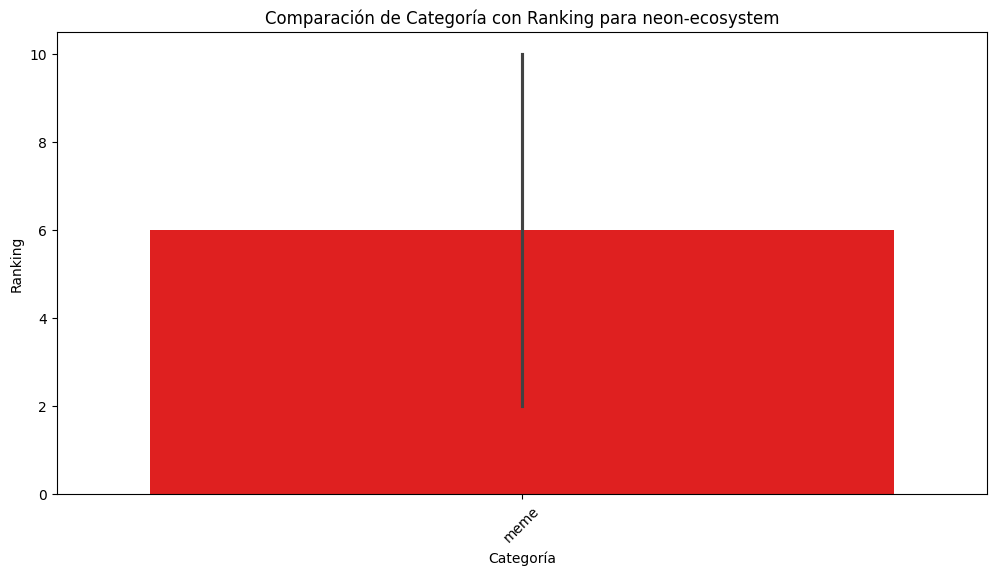

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


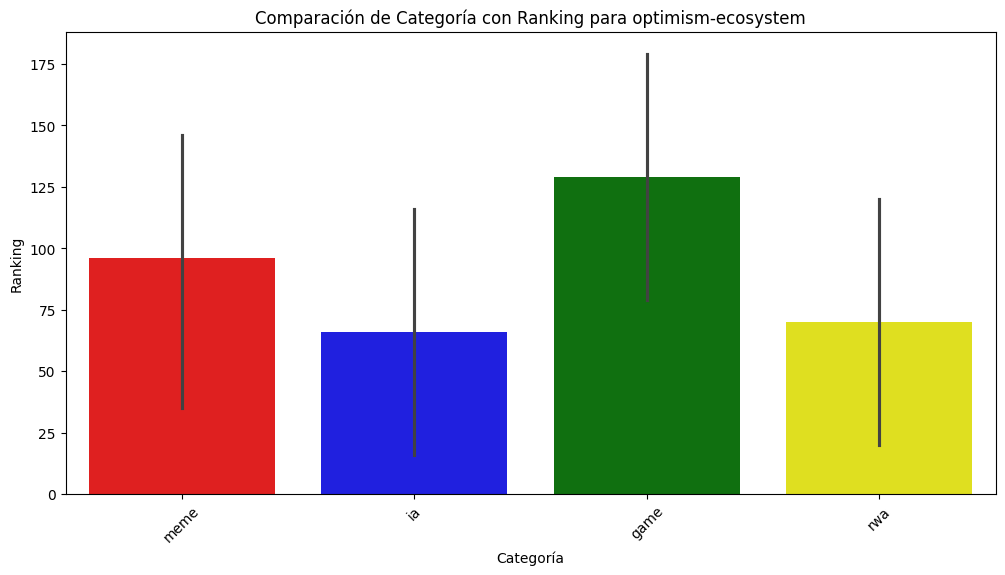

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


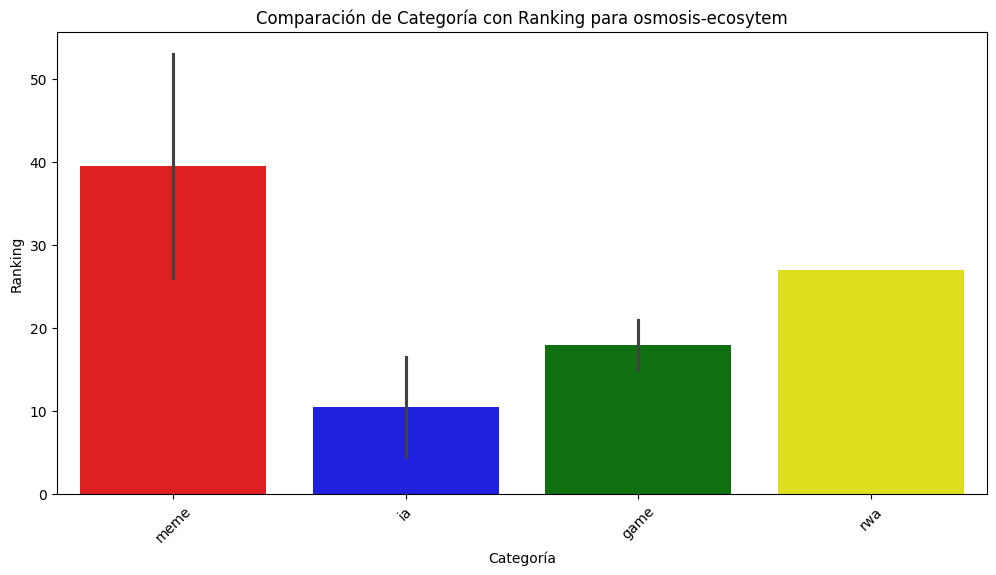

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


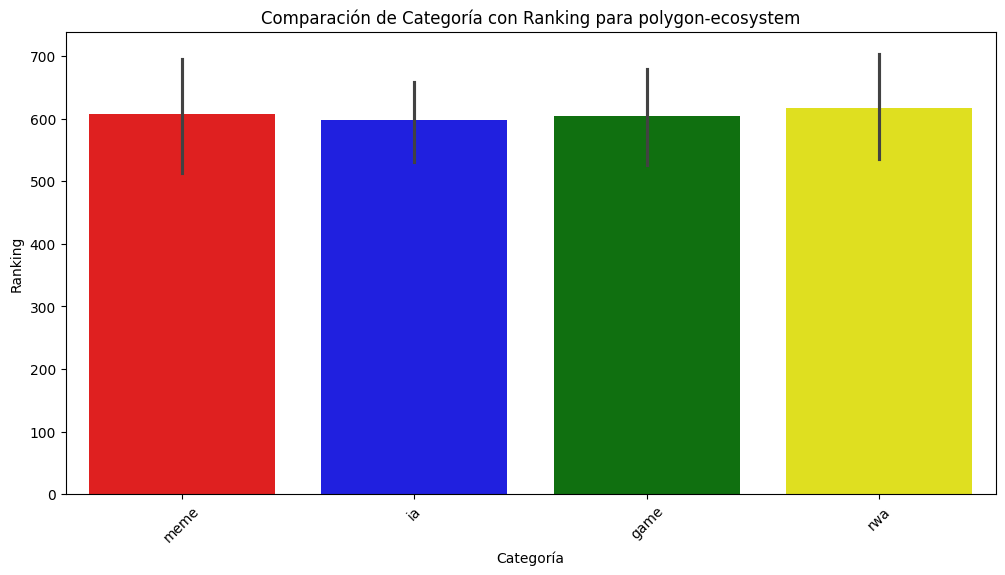

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


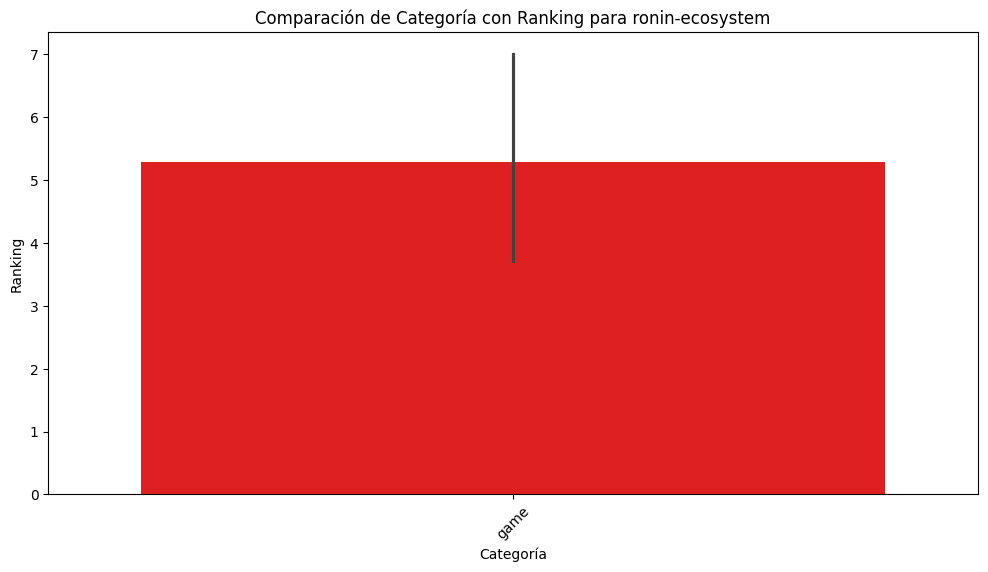

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


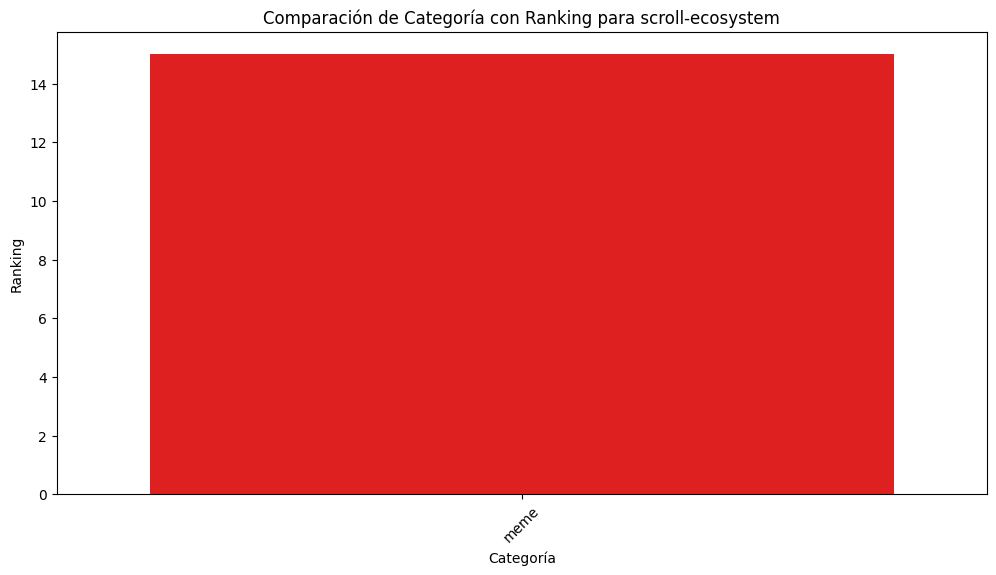

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


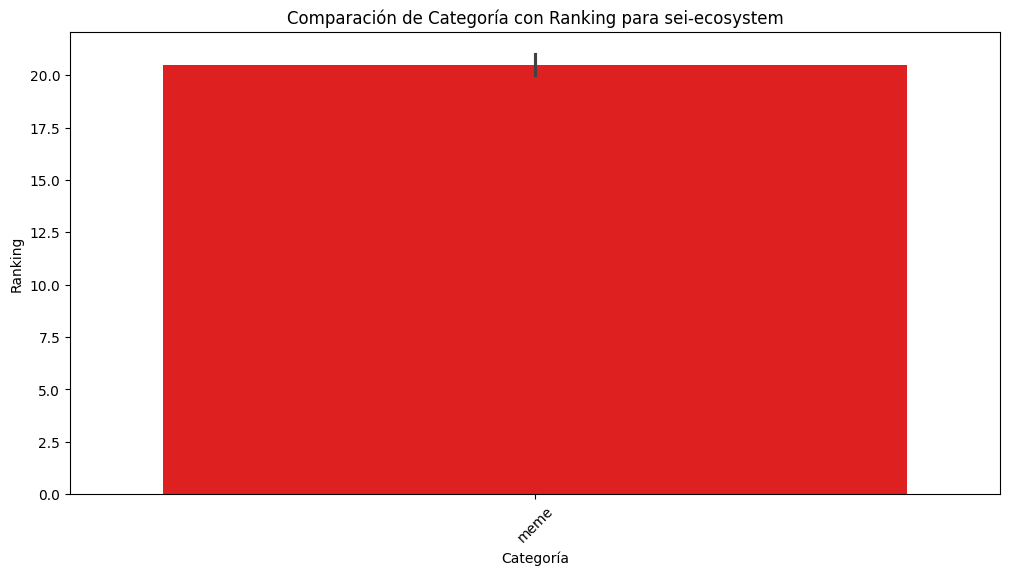

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


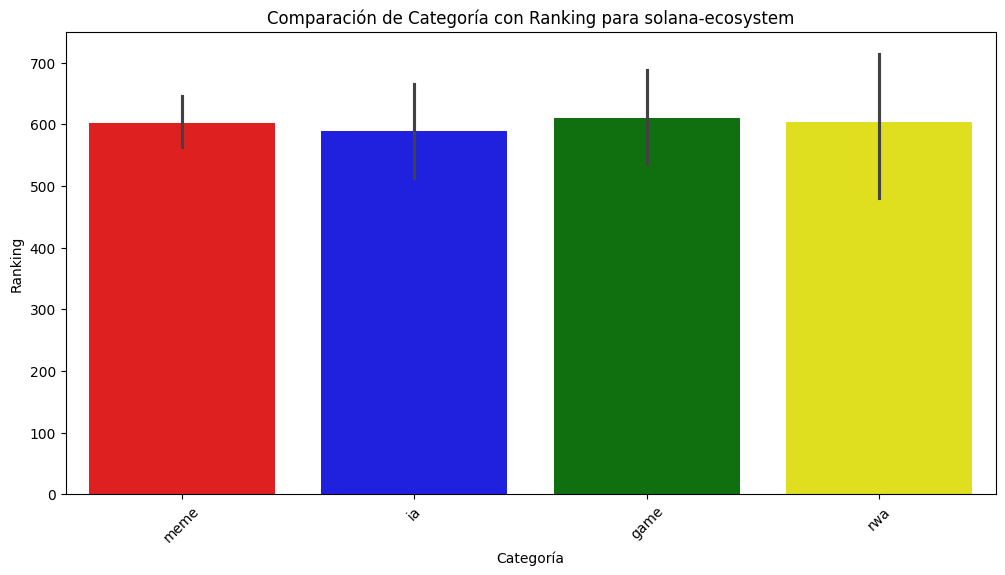

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


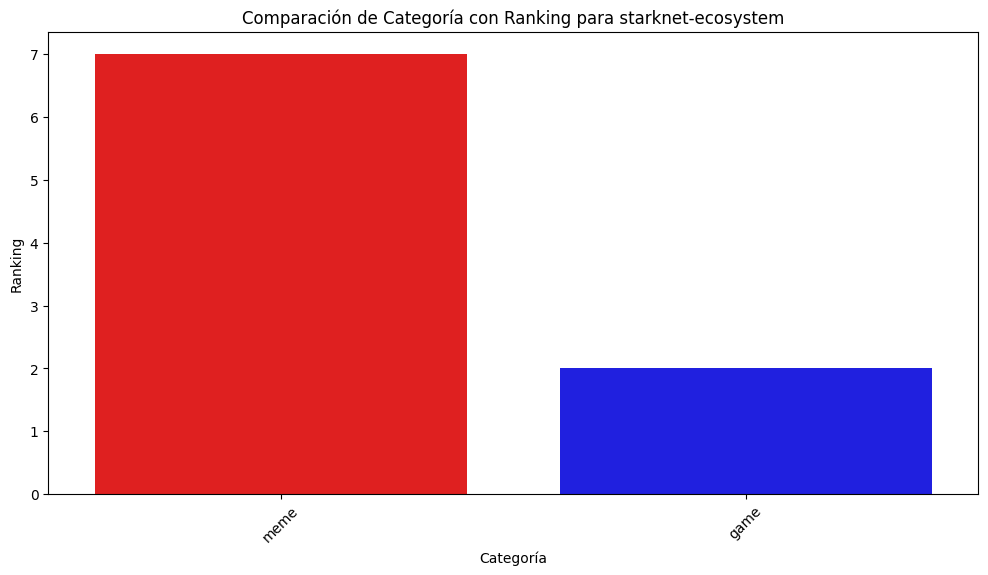

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


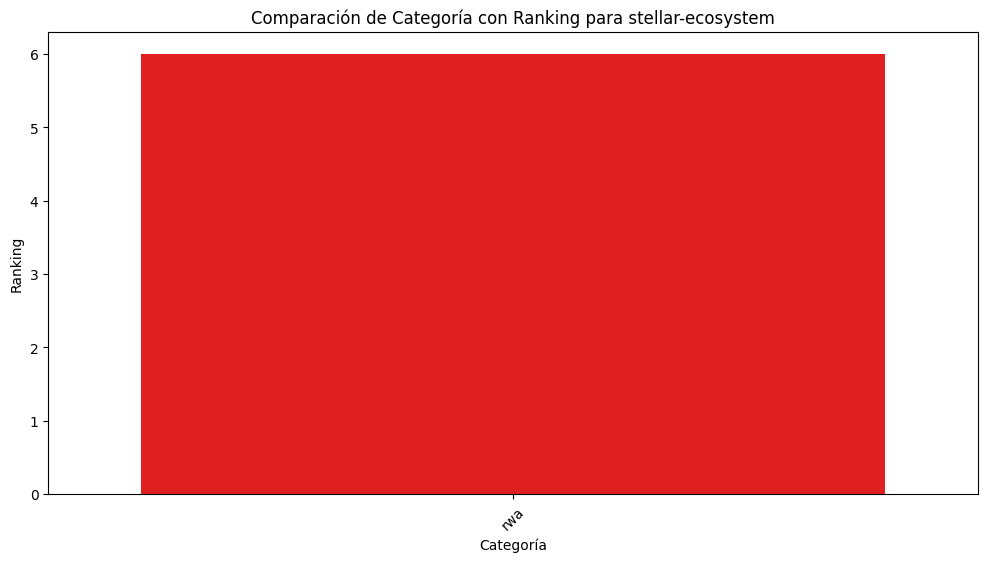

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


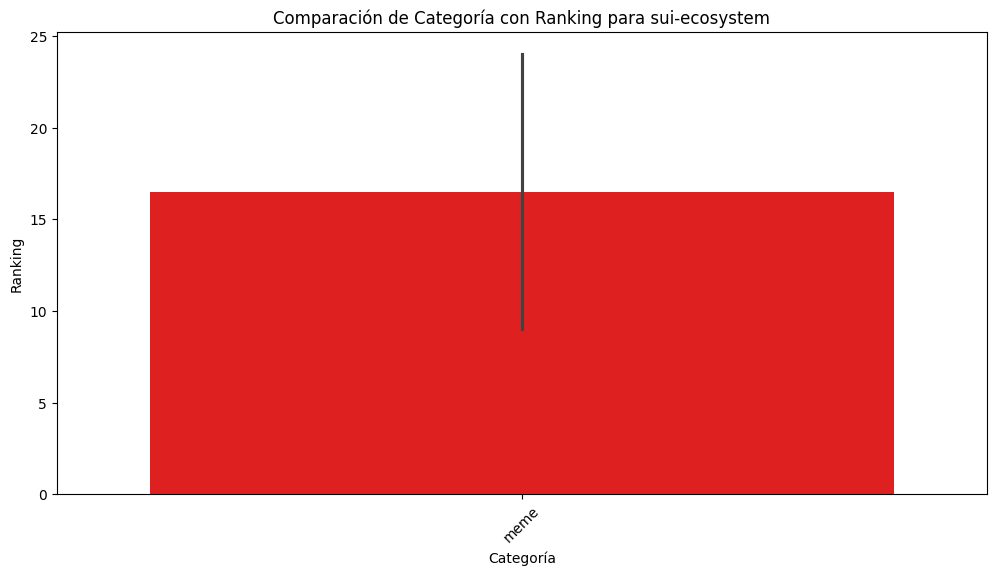

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


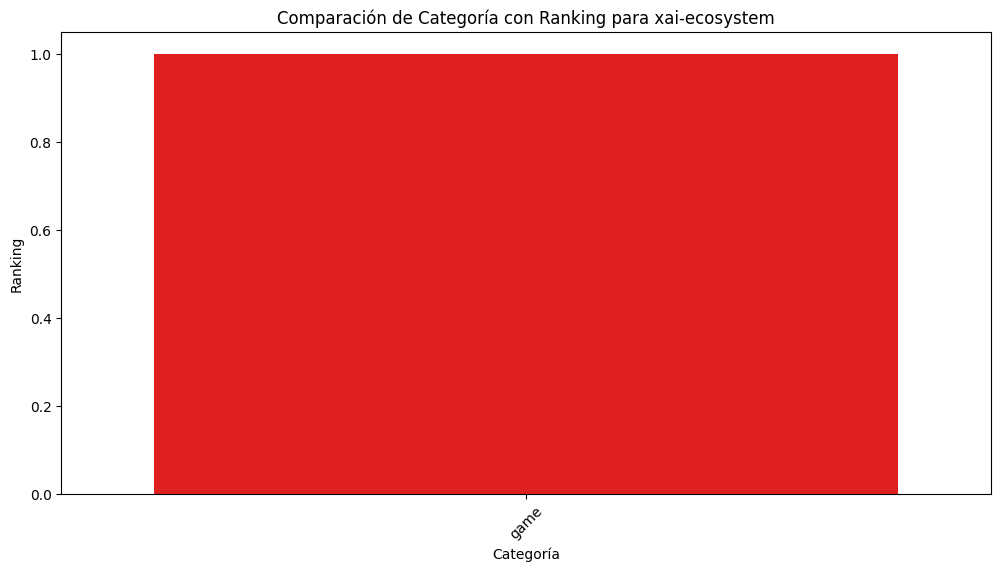

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


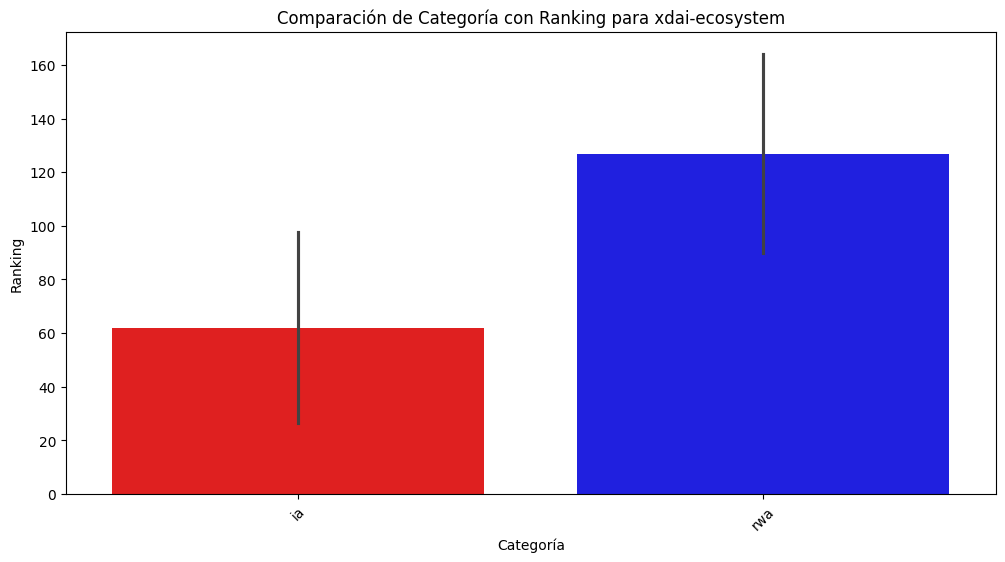

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


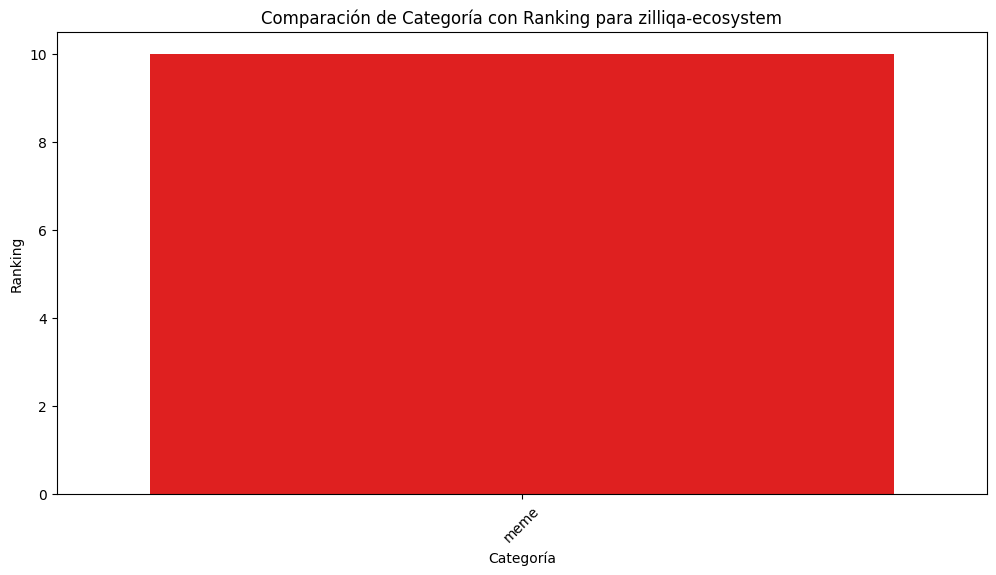

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


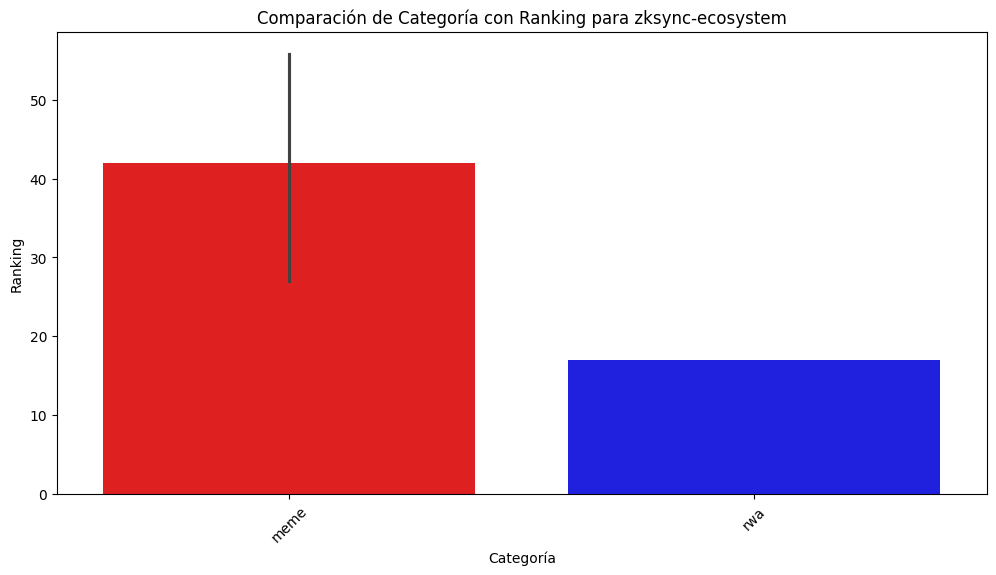

<ipython-input-115-898af62ee40c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())


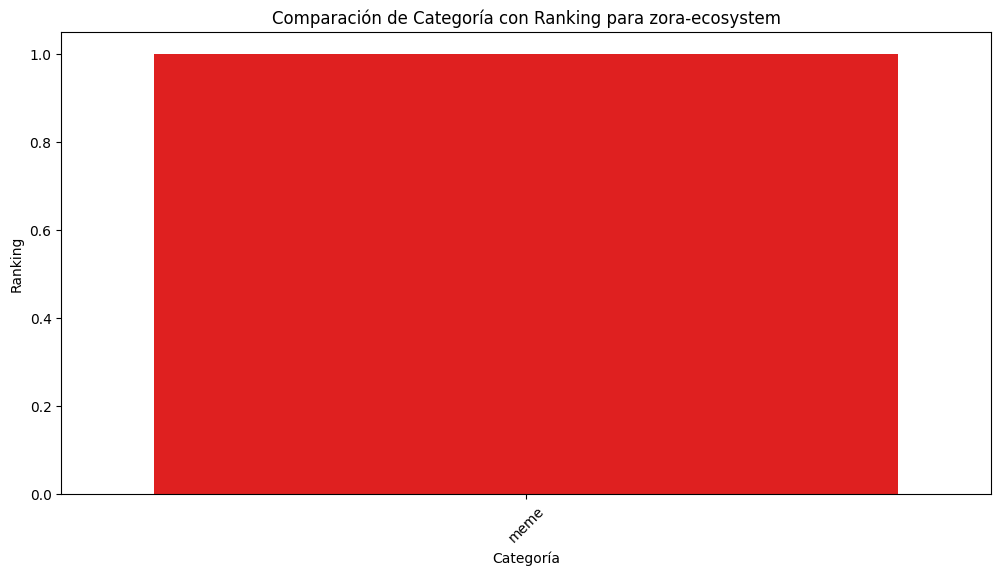

In [115]:
# Copiar el DataFrame original para evitar modificar los datos originales
eth_copy = eth.copy()

# Definir colores para cada categoría
colors = {'meme': 'red', 'ia': 'blue', 'game': 'green', 'rwa': 'yellow'}

# Crear subgráficos para cada blockchain
blockchains = eth_copy['blockchain'].unique()

for blockchain in blockchains:
    # Filtrar datos para la blockchain actual
    blockchain_data = eth_copy[eth_copy['blockchain'] == blockchain]

    # Gráfico de Barras
    plt.figure(figsize=(12, 6))
    sns.barplot(x='categoria', y='ranking', data=blockchain_data, palette=colors.values())
    plt.title(f'Comparación de Categoría con Ranking para {blockchain}')
    plt.xlabel('Categoría')
    plt.ylabel('Ranking')
    plt.xticks(rotation=45)
    plt.show()